# Top 5 Zip Codes in Florida to Invest In
**Author:** Aziza Gulyamova
***



## Overview


For this project, I will be acting as a consultant for a real-estate investment firm. The main goal for my project is to identify **Top 5 zip codes** that are worth investing in anfd **forecast the price**. The assumptions that real investment firm has to meet are following: 

* The minimum capital of investment is \$200,000
* The goal is to invest in highly urbanized U.S. areas
* Low risk factor (low volatility threshold)

***

### Why Florida State?

Florida real estate has always been a good deal for investors. Stunning beaches, beautiful weather, numerous landmarks and attractions, various opportunities and no income tax are just a few of the top reasons why new residents and investors are attracted to Florida. In 2019 Florida became one of the seven states that forgo individual income taxes. In addition, mortgage rates are still at the lowest levels since the 1960s. The housing market is more stable compared to the early 2010s.

Source: Florida Property Management & Sales  
Link to article: https://floridapropertyrealty.com/tax-benefits-florida-real-estate/
***

## Data

The **Home Listing and Sales** dataset was provided by **Zillow Research**. The data represents **median monthly housing sales prices** over the period of April 1996 through April 2018.

Each row represents a unique zip code. Each record contains location info and median housing sales prices for each month.

The raw CSV contained the following **columns:**

RegionID  
RegionName -- ZIP Code  
City  
State  
Metro   
CountyName  
SizeRank -- rank of the zipcode according to urbanization.

**Link to dataset:** https://www.zillow.com/research/data/

## Plan of Analysis

<br>
<details><summary><b>Data Exploration</b></summary>
    <ul>
        <li>Import Packages</li>
        <li>Upload Dataset</li>
        <li>Explore Dataset</li>
        <li>Visual Exploration</li>
    </ul>
</details>     
<details><summary><b>Exploration Analysis</b></summary>
    <ul>
        <li>Minimum Price</li>
        <li>Volatility</li>
        <li>ROI for 24 Months</li>
    </ul>
</details>     
<details><summary><b>Data Preparation</b></summary>
    <ul>
        <li>Sationarity</li>
        <li>Non Stationary to Stationary</li>
        <li>ACF and PACF</li>
    </ul>
</details>     
  
<details><summary><b>BASELINE AUTO-ARIMA MODEL</b></summary>
    <ul>
        <li><b>Train Test Split</b></li>
        <li>## 33064 Zipcode Model</li>
        <li>## 33157 Zipcode Model</li>
        <li>## 32825 Zipcode Model</li>
        <li>## 33463 Zipcode Model</li>
        <li>## 34698 Zipcode Model</li>
        <li>## 33020 Zipcode Model</li>
        <li>## 33033 Zipcode Model</li>
        <li>## 32771 Zipcode Model</li>
    </ul>
</details>     
<b>SARIMAX (2, 0, 0) Model</b>
<details><summary><b>Facebook Prophet Model</b></summary>
    <ul>
        <li>Train - Test Split</li>
        <li>## 33064 Zipcode</li>
        <li>## 33033 Zipcode</li>
        <li>## 33157 Zipcode</li>
    </ul>
</details> 
<b>Final SARIMAX (2, 0, 0) Model</b>
<details><summary><b>Results and Conclusions</b></summary>
    <ul>
        <li>Results</li>
        <li>Notes</li>
        <li>Next Steps</li>
    </ul>
</details> 

# Data Exploration
Before proceeding to any analysis and modeling, I will need to upload necessary packages and upload dataset. After that, the data needs to bee explored and cleaned from unnecessary columns and observations.



## Import Packages

Import necessary packages and libraries for data cleaning and manipulation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from functools import reduce
from datetime import datetime

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

# Import additional files with statistical functions
import sys
import os

module_path = os.path.abspath(os.path.join('./src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import explore_data as ed
import ts_functions as tsf

Import and load modeling and forecasting tools

In [2]:
!pip install pmdarima

In [3]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots

from pmdarima import auto_arima                              # for determining ARIMA orders
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

import itertools

In [4]:
from statsmodels.tsa.arima.model import ARIMA

Adjust the notebook settings

In [5]:
pd.options.display.max_rows = 700
pd.options.display.max_columns = 100
plt.style.use('seaborn')

## Upload Dataset

The dataset is provided by **Zillow Resarch** and stored in **Dataset folder** of the project. I will upload data into **zillow** variable and store all features as an object data type in order to keep possible leading zeros.

In [6]:
zillow = pd.read_csv('./data/zillow_data.csv', dtype = 'object' )

In [7]:
zillow.head()

RegionID RegionName      City State              Metro CountyName SizeRank  \
0    84654      60657   Chicago    IL            Chicago       Cook        1   
1    90668      75070  McKinney    TX  Dallas-Fort Worth     Collin        2   
2    91982      77494      Katy    TX            Houston     Harris        3   
3    84616      60614   Chicago    IL            Chicago       Cook        4   
4    93144      79936   El Paso    TX            El Paso    El Paso        5   

  1996-04 1996-05 1996-06 1996-07 1996-08 1996-09 1996-10 1996-11 1996-12  \
0  334200  335400  336500  337600  338500  339500  340400  341300  342600   
1  235700  236900  236700  235400  233300  230600  227300  223400  219600   
2  210400  212200  212200  210700  208300  205500  202500  199800  198300   
3  498100  500900  503100  504600  505500  505700  505300  504200  503600   
4   77300   77300   77300   77300   77400   77500   77600   77700   77700   

  1997-01 1997-02 1997-03 1997-04 1997-05 1997-06 1997-07 1997-08 1997-09  \
0  344400  345700  346700  347800  349000  350400  352000  353900  356200   
1  215800  211100  205700  200900  196800  193600  191400  190400  190800   
2  197300  195400  193000  191800  191800  193000  195200  198400  202800   
3  503400  502200  500000  497900  496300  495200  494700  494900  496200   
4   77800   77900   77900   77800   77800   77800   77800   77800   77900   

  1997-10 1997-11 1997-12 1998-01 1998-02 1998-03 1998-04 1998-05 1998-06  \
0  358800  361800  365700  370200  374700  378900  383500  388300  393300   
1  192700  196000  201300  207400  212200  214600  215100  213400  210200   
2  208000  213800  220700  227500  231800  233400  233900  233500  233300   
3  498600  502000  507600  514900  522200  529500  537900  546900  556400   
4   78100   78200   78400   78600   78800   79000   79100   79200   79300   

  1998-07 1998-08 1998-09 1998-10 1998-11 1998-12 1999-01 1999-02 1999-03  \
0  398500  403800  409100  414600  420100  426200  432600  438600  444200   
1  206100  202100  198800  196100  194100  193400  193400  193100  192700   
2  234300  237400  242800  250200  258600  268000  277000  283600  288500   
3  566100  575600  584800  593500  601600  610100  618600  625600  631100   
4   79300   79300   79400   79500   79500   79600   79700   79900   80100   

  1999-04 1999-05 1999-06 1999-07 1999-08 1999-09 1999-10  ...  2014-03  \
0  450000  455900  462100  468500  475300  482500  490200  ...   863900   
1  193000  193700  194800  196100  197800  199700  201900  ...   234200   
2  293900  299200  304300  308600  311400  312300  311900  ...   282100   
3  636600  642100  647600  653300  659300  665800  672900  ...  1149900   
4   80300   80600   80900   81200   81400   81700   82100  ...   112000   

   2014-04  2014-05  2014-06  2014-07  2014-08  2014-09  2014-10  2014-11  \
0   872900   883300   889500   892800   893600   891300   889900   891500   
1   235400   236600   238500   240500   242600   244700   246300   247600   
2   284200   286000   288300   290700   293300   295900   298300   300200   
3  1155200  1160100  1163300  1167700  1173900  1175100  1173500  1175500   
4   112500   112700   113100   113900   114400   114500   114400   114300   

   2014-12  2015-01  2015-02  2015-03  2015-04  2015-05  2015-06  2015-07  \
0   893000   893000   895000   901200   909400   915000   916700   917700   
1   249600   251400   253000   255200   258000   261200   264700   268400   
2   301300   301700   302400   303600   306200   309100   311900   314100   
3  1178500  1176400  1174600  1178500  1185700  1192900  1198800  1200400   
4   114400   114700   115000   115000   115200   115600   115900   115600   

   2015-08  2015-09  2015-10  2015-11  2015-12  2016-01  2016-02  2016-03  \
0   919800   925800   937100   948200   951000   952500   958600   966200   
1   271400   273600   275200   276400   277000   277900   280000   282600   
2   316300   319000   322000   324300   326100   327300   327

In [8]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: object(272)
memory usage: 30.6+ MB


* The data appears to be stored in **wide format**, meaning that the **observations of time feature are stored as individual columns** with median **house price value as observations**. 

## Explore Data

* Extract data for **Florida State**
* Choose **highly urbanized** zipcodes
* Remove **unnecessary variables**
* Check for missing values

For my project, I chose to focus on **zipcodes of the FL state**, since it is one of the states with **high inbound migration** percentage and also has **no state income taxation**. Thus, the real estate market there is at **high performance.** 

First, I will select observations only for FL state.

In [9]:
fl_df = zillow[zillow['State']=='FL']
fl_df.head()

RegionID RegionName               City State                  Metro  \
11    71831      32162       The Villages    FL           The Villages   
60    72463      33160  Sunny Isles Beach    FL  Miami-Fort Lauderdale   
82    72363      33025            Miramar    FL  Miami-Fort Lauderdale   
83    72578      33411   Royal Palm Beach    FL  Miami-Fort Lauderdale   
84    72442      33139        Miami Beach    FL  Miami-Fort Lauderdale   

    CountyName SizeRank 1996-04 1996-05 1996-06 1996-07 1996-08 1996-09  \
11      Sumter       12  101000  100700  100400  100100   99800   99500   
60  Miami-Dade       61  337300  337900  338300  338400  338400  338200   
82     Broward       83  111600  111700  111800  111900  112000  112100   
83  Palm Beach       84  126800  126800  126800  126800  126700  126700   
84  Miami-Dade       85  480200  480700  481200  481600  482000  482500   

   1996-10 1996-11 1996-12 1997-01 1997-02 1997-03 1997-04 1997-05 1997-06  \
11   99200   98900   98600   98000   97100   95800   94300   92800   91500   
60  338000  338000  338400  339100  339400  339000  338500  337900  337000   
82  112200  112300  112500  112700  112800  112700  112600  112500  112300   
83  126800  126800  127000  127100  127200  127100  127000  127100  127200   
84  483100  483700  484800  486100  486900  486900  486600  486300  485800   

   1997-07 1997-08 1997-09 1997-10 1997-11 1997-12 1998-01 1998-02 1998-03  \
11   90500   89800   89500   89300   89400   89800   90500   91500   92700   
60  335900  334800  333800  333000  332400  332600  333300  333800  333900   
82  112200  112100  112100  112200  112400  112800  113400  114000  114300   
83  127600  128000  128600  129300  130100  131100  132000  132900  133400   
84  485100  484300  483500  482700  482000  481900  482100  482000  481400   

   1998-04 1998-05 1998-06 1998-07 1998-08 1998-09 1998-10 1998-11 1998-12  \
11   94100   95700   97200   98400   99400  100300  101200  102400  104000   
60  334000  334100  334200  334300  334500  334900  335600  336600  338500   
82  114600  114900  115000  115100  115100  115200  115200  115300  115500   
83  133800  134100  134300  134500  134500  134500  134600  134600  134700   
84  481000  480900  481000  481500  482400  483800  485600  487900  491200   

   1999-01 1999-02 1999-03 1999-04 1999-05 1999-06 1999-07 1999-08 1999-09  \
11  106000  108300  110700  113200  115700  117900  119700  121200  122400   
60  341000  343400  345500  347800  350200  352600  355100  357700  360600   
82  115900  116200  116400  116600  116800  116900  117000  117100  117300   
83  134800  135000  135100  135400  135800  136200  136700  137300  138000   
84  495100  498900  502600  506800  511400  516300  521600  527300  533500   

   1999-10  ...  2014-03  2014-04  2014-05  2014-06  2014-07  2014-08  \
11  123400  ...   228200   229800   231600   233600   235700   237900   
60  363800  ...  1016000  1023400  1032400  1043400  1072200  1115700   
82  117500  ...   185600   186100   187100   188800   191100   193800   
83  138700  ...   216800   219400   222500   226600   230600   233100   
84  540100  ...  1954400  1970500  1993600  2018700  2045300  2074500   

    2014-09  2014-10  2014-11  2014-12  2015-01  2015-02  2015-03  2015-04  \
11   239500   240400   240900   241300   241800   242600   243400   244100   
60  1147800  1151900  1150200  1141400  1134200  1152000  1197200  1236200   
82   195800   197500   199600   201900   204100   206600   209700   213200   
83   234300   235800   237500   239100   240400   242200   245000   247600   
84  2122900  2187500  2228000  2240400  2251600  2265500  2292100  2342700   

    2015-05  2015-06  2015-07  2015-08  2015-09  2015-10  2015-11  2015-12  \
11   244400   244200   243900   244800   247600   250100   251000   251600   
60  1264200  1290500  1304300  1308200  1317500  1335100  1350100  1358200   
82   216400   219300   222200   224800   226700   228200   230200   232300   
83   249300

* Now, I will drop columns that are not needed for my analysis, rename the **RegionName** feature to **Zipcode** and reset index.

In [10]:
fl_df.drop(columns = ["RegionID", "City", "State", "Metro", "CountyName"], axis=1, inplace = True)
fl_df.rename(columns={'RegionName': 'Zipcode'}, inplace=True)
fl_df.head()

Zipcode SizeRank 1996-04 1996-05 1996-06 1996-07 1996-08 1996-09 1996-10  \
11   32162       12  101000  100700  100400  100100   99800   99500   99200   
60   33160       61  337300  337900  338300  338400  338400  338200  338000   
82   33025       83  111600  111700  111800  111900  112000  112100  112200   
83   33411       84  126800  126800  126800  126800  126700  126700  126800   
84   33139       85  480200  480700  481200  481600  482000  482500  483100   

   1996-11 1996-12 1997-01 1997-02 1997-03 1997-04 1997-05 1997-06 1997-07  \
11   98900   98600   98000   97100   95800   94300   92800   91500   90500   
60  338000  338400  339100  339400  339000  338500  337900  337000  335900   
82  112300  112500  112700  112800  112700  112600  112500  112300  112200   
83  126800  127000  127100  127200  127100  127000  127100  127200  127600   
84  483700  484800  486100  486900  486900  486600  486300  485800  485100   

   1997-08 1997-09 1997-10 1997-11 1997-12 1998-01 1998-02 1998-03 1998-04  \
11   89800   89500   89300   89400   89800   90500   91500   92700   94100   
60  334800  333800  333000  332400  332600  333300  333800  333900  334000   
82  112100  112100  112200  112400  112800  113400  114000  114300  114600   
83  128000  128600  129300  130100  131100  132000  132900  133400  133800   
84  484300  483500  482700  482000  481900  482100  482000  481400  481000   

   1998-05 1998-06 1998-07 1998-08 1998-09 1998-10 1998-11 1998-12 1999-01  \
11   95700   97200   98400   99400  100300  101200  102400  104000  106000   
60  334100  334200  334300  334500  334900  335600  336600  338500  341000   
82  114900  115000  115100  115100  115200  115200  115300  115500  115900   
83  134100  134300  134500  134500  134500  134600  134600  134700  134800   
84  480900  481000  481500  482400  483800  485600  487900  491200  495100   

   1999-02 1999-03 1999-04 1999-05 1999-06 1999-07 1999-08 1999-09 1999-10  \
11  108300  110700  113200  115700  117900  119700  121200  122400  123400   
60  343400  345500  347800  350200  352600  355100  357700  360600  363800   
82  116200  116400  116600  116800  116900  117000  117100  117300  117500   
83  135000  135100  135400  135800  136200  136700  137300  138000  138700   
84  498900  502600  506800  511400  516300  521600  527300  533500  540100   

   1999-11 1999-12 2000-01 2000-02 2000-03  ...  2014-03  2014-04  2014-05  \
11  123900  124100  124100  123800  123400  ...   228200   229800   231600   
60  367500  372200  377600  382900  388200  ...  1016000  1023400  1032400   
82  117900  118600  119500  120600  121700  ...   185600   186100   187100   
83  139500  140300  141300  142300  143000  ...   216800   219400   222500   
84  547300  555400  564100  572700  581200  ...  1954400  1970500  1993600   

    2014-06  2014-07  2014-08  2014-09  2014-10  2014-11  2014-12  2015-01  \
11   233600   235700   237900   239500   240400   240900   241300   241800   
60  1043400  1072200  1115700  1147800  1151900  1150200  1141400  1134200   
82   188800   191100   193800   195800   197500   199600   201900   204100   
83   226600   230600   233100   234300   235800   237500   239100   240400   
84  2018700  2045300  2074500  2122900  2187500  2228000  2240400  2251600   

    2015-02  2015-03  2015-04  2015-05  2015-06  2015-07  2015-08  2015-09  \
11   242600   243400   244100   244400   244200   243900   244800   247600   
60  1152000  1197200  1236200  1264200  1290500  1304300  1308200  1317500   
82   206600   209700   213200   216400   219300   222200   224800   226700   
83   242200   245000   247600   249300   250600   251900   253300   255400   
84  2265500  2292100  2342700  2391200  2427000  2436500  2467500  2526100   

    2015-10  2015-11  2015-12  2016-01  2016-02  2016-03  2016-04  2016-05  \
11   250100   251000   251600   252000   252000   251400   250700   250200   
60  1335100  1350100  1358200  1365200  1377400  1389700  1393600  1388400   
82   228200

In [11]:
fl_df.reset_index(drop=True, inplace=True)
fl_df.head()

Zipcode SizeRank 1996-04 1996-05 1996-06 1996-07 1996-08 1996-09 1996-10  \
0   32162       12  101000  100700  100400  100100   99800   99500   99200   
1   33160       61  337300  337900  338300  338400  338400  338200  338000   
2   33025       83  111600  111700  111800  111900  112000  112100  112200   
3   33411       84  126800  126800  126800  126800  126700  126700  126800   
4   33139       85  480200  480700  481200  481600  482000  482500  483100   

  1996-11 1996-12 1997-01 1997-02 1997-03 1997-04 1997-05 1997-06 1997-07  \
0   98900   98600   98000   97100   95800   94300   92800   91500   90500   
1  338000  338400  339100  339400  339000  338500  337900  337000  335900   
2  112300  112500  112700  112800  112700  112600  112500  112300  112200   
3  126800  127000  127100  127200  127100  127000  127100  127200  127600   
4  483700  484800  486100  486900  486900  486600  486300  485800  485100   

  1997-08 1997-09 1997-10 1997-11 1997-12 1998-01 1998-02 1998-03 1998-04  \
0   89800   89500   89300   89400   89800   90500   91500   92700   94100   
1  334800  333800  333000  332400  332600  333300  333800  333900  334000   
2  112100  112100  112200  112400  112800  113400  114000  114300  114600   
3  128000  128600  129300  130100  131100  132000  132900  133400  133800   
4  484300  483500  482700  482000  481900  482100  482000  481400  481000   

  1998-05 1998-06 1998-07 1998-08 1998-09 1998-10 1998-11 1998-12 1999-01  \
0   95700   97200   98400   99400  100300  101200  102400  104000  106000   
1  334100  334200  334300  334500  334900  335600  336600  338500  341000   
2  114900  115000  115100  115100  115200  115200  115300  115500  115900   
3  134100  134300  134500  134500  134500  134600  134600  134700  134800   
4  480900  481000  481500  482400  483800  485600  487900  491200  495100   

  1999-02 1999-03 1999-04 1999-05 1999-06 1999-07 1999-08 1999-09 1999-10  \
0  108300  110700  113200  115700  117900  119700  121200  122400  123400   
1  343400  345500  347800  350200  352600  355100  357700  360600  363800   
2  116200  116400  116600  116800  116900  117000  117100  117300  117500   
3  135000  135100  135400  135800  136200  136700  137300  138000  138700   
4  498900  502600  506800  511400  516300  521600  527300  533500  540100   

  1999-11 1999-12 2000-01 2000-02 2000-03  ...  2014-03  2014-04  2014-05  \
0  123900  124100  124100  123800  123400  ...   228200   229800   231600   
1  367500  372200  377600  382900  388200  ...  1016000  1023400  1032400   
2  117900  118600  119500  120600  121700  ...   185600   186100   187100   
3  139500  140300  141300  142300  143000  ...   216800   219400   222500   
4  547300  555400  564100  572700  581200  ...  1954400  1970500  1993600   

   2014-06  2014-07  2014-08  2014-09  2014-10  2014-11  2014-12  2015-01  \
0   233600   235700   237900   239500   240400   240900   241300   241800   
1  1043400  1072200  1115700  1147800  1151900  1150200  1141400  1134200   
2   188800   191100   193800   195800   197500   199600   201900   204100   
3   226600   230600   233100   234300   235800   237500   239100   240400   
4  2018700  2045300  2074500  2122900  2187500  2228000  2240400  2251600   

   2015-02  2015-03  2015-04  2015-05  2015-06  2015-07  2015-08  2015-09  \
0   242600   243400   244100   244400   244200   243900   244800   247600   
1  1152000  1197200  1236200  1264200  1290500  1304300  1308200  1317500   
2   206600   209700   213200   216400   219300   222200   224800   226700   
3   242200   245000   247600   249300   250600   251900   253300   255400   
4  2265500  2292100  2342700  2391200  2427000  2436500  2467500  2526100   

   2015-10  2015-11  2015-12  2016-01  2016-02  2016-03  2016-04  2016-05  \
0   250100   251000   251600   252000   252000   251400   250700   250200   
1  1335100  1350100  1358200  1365200  1377400  1389700  1393600  1388400   
2   228200   230200   232300   234600   236300   237400   238

### Highly Urbanized Zip Codes

I will sort out the zipcodes with highest **SizeRank**, since the real estate market is higly growing where the urbanization is high. I will keep zip codes that are at **top 15 quantile** according to the SizeRank variable.

In [12]:
#first, convert SizeRank variable to numeric data type
fl_df["SizeRank"]=fl_df["SizeRank"].astype(int)

#calculate the 0.15 quantile
sr_15q = fl_df.SizeRank.quantile(q=0.15) 
# select data only in top 15 quantile of SizeRank
fl_top15= fl_df[fl_df['SizeRank']<sr_15q]

In [13]:
fl_top15.drop(columns = 'SizeRank', inplace = True, axis = 1)
fl_top15.head()

Zipcode 1996-04 1996-05 1996-06 1996-07 1996-08 1996-09 1996-10 1996-11  \
0   32162  101000  100700  100400  100100   99800   99500   99200   98900   
1   33160  337300  337900  338300  338400  338400  338200  338000  338000   
2   33025  111600  111700  111800  111900  112000  112100  112200  112300   
3   33411  126800  126800  126800  126800  126700  126700  126800  126800   
4   33139  480200  480700  481200  481600  482000  482500  483100  483700   

  1996-12 1997-01 1997-02 1997-03 1997-04 1997-05 1997-06 1997-07 1997-08  \
0   98600   98000   97100   95800   94300   92800   91500   90500   89800   
1  338400  339100  339400  339000  338500  337900  337000  335900  334800   
2  112500  112700  112800  112700  112600  112500  112300  112200  112100   
3  127000  127100  127200  127100  127000  127100  127200  127600  128000   
4  484800  486100  486900  486900  486600  486300  485800  485100  484300   

  1997-09 1997-10 1997-11 1997-12 1998-01 1998-02 1998-03 1998-04 1998-05  \
0   89500   89300   89400   89800   90500   91500   92700   94100   95700   
1  333800  333000  332400  332600  333300  333800  333900  334000  334100   
2  112100  112200  112400  112800  113400  114000  114300  114600  114900   
3  128600  129300  130100  131100  132000  132900  133400  133800  134100   
4  483500  482700  482000  481900  482100  482000  481400  481000  480900   

  1998-06 1998-07 1998-08 1998-09 1998-10 1998-11 1998-12 1999-01 1999-02  \
0   97200   98400   99400  100300  101200  102400  104000  106000  108300   
1  334200  334300  334500  334900  335600  336600  338500  341000  343400   
2  115000  115100  115100  115200  115200  115300  115500  115900  116200   
3  134300  134500  134500  134500  134600  134600  134700  134800  135000   
4  481000  481500  482400  483800  485600  487900  491200  495100  498900   

  1999-03 1999-04 1999-05 1999-06 1999-07 1999-08 1999-09 1999-10 1999-11  \
0  110700  113200  115700  117900  119700  121200  122400  123400  123900   
1  345500  347800  350200  352600  355100  357700  360600  363800  367500   
2  116400  116600  116800  116900  117000  117100  117300  117500  117900   
3  135100  135400  135800  136200  136700  137300  138000  138700  139500   
4  502600  506800  511400  516300  521600  527300  533500  540100  547300   

  1999-12 2000-01 2000-02 2000-03 2000-04  ...  2014-03  2014-04  2014-05  \
0  124100  124100  123800  123400  123100  ...   228200   229800   231600   
1  372200  377600  382900  388200  393600  ...  1016000  1023400  1032400   
2  118600  119500  120600  121700  123200  ...   185600   186100   187100   
3  140300  141300  142300  143000  143700  ...   216800   219400   222500   
4  555400  564100  572700  581200  590000  ...  1954400  1970500  1993600   

   2014-06  2014-07  2014-08  2014-09  2014-10  2014-11  2014-12  2015-01  \
0   233600   235700   237900   239500   240400   240900   241300   241800   
1  1043400  1072200  1115700  1147800  1151900  1150200  1141400  1134200   
2   188800   191100   193800   195800   197500   199600   201900   204100   
3   226600   230600   233100   234300   235800   237500   239100   240400   
4  2018700  2045300  2074500  2122900  2187500  2228000  2240400  2251600   

   2015-02  2015-03  2015-04  2015-05  2015-06  2015-07  2015-08  2015-09  \
0   242600   243400   244100   244400   244200   243900   244800   247600   
1  1152000  1197200  1236200  1264200  1290500  1304300  1308200  1317500   
2   206600   209700   213200   216400   219300   222200   224800   226700   
3   242200   245000   247600   249300   250600   251900   253300   255400   
4  2265500  2292100  2342700  2391200  2427000  2436500  2467500  2526100   

   2015-10  2015-11  2015-12  2016-01  2016-02  2016-03  2016-04  2016-05  \
0   250100   251000   251600   252000   252000   251400   250700   250200   
1  1335100  1350100  1358200  1365200  1377400  1389700  1393600  1388400   
2   228200   230200   232300   234600   236300   237400   238300   

In [14]:
# set Zipcode variable as index
fl_top15.set_index('Zipcode', inplace = True)
fl_top15.head()

1996-04 1996-05 1996-06 1996-07 1996-08 1996-09 1996-10 1996-11  \
Zipcode                                                                   
32162    101000  100700  100400  100100   99800   99500   99200   98900   
33160    337300  337900  338300  338400  338400  338200  338000  338000   
33025    111600  111700  111800  111900  112000  112100  112200  112300   
33411    126800  126800  126800  126800  126700  126700  126800  126800   
33139    480200  480700  481200  481600  482000  482500  483100  483700   

        1996-12 1997-01 1997-02 1997-03 1997-04 1997-05 1997-06 1997-07  \
Zipcode                                                                   
32162     98600   98000   97100   95800   94300   92800   91500   90500   
33160    338400  339100  339400  339000  338500  337900  337000  335900   
33025    112500  112700  112800  112700  112600  112500  112300  112200   
33411    127000  127100  127200  127100  127000  127100  127200  127600   
33139    484800  486100  486900  486900  486600  486300  485800  485100   

        1997-08 1997-09 1997-10 1997-11 1997-12 1998-01 1998-02 1998-03  \
Zipcode                                                                   
32162     89800   89500   89300   89400   89800   90500   91500   92700   
33160    334800  333800  333000  332400  332600  333300  333800  333900   
33025    112100  112100  112200  112400  112800  113400  114000  114300   
33411    128000  128600  129300  130100  131100  132000  132900  133400   
33139    484300  483500  482700  482000  481900  482100  482000  481400   

        1998-04 1998-05 1998-06 1998-07 1998-08 1998-09 1998-10 1998-11  \
Zipcode                                                                   
32162     94100   95700   97200   98400   99400  100300  101200  102400   
33160    334000  334100  334200  334300  334500  334900  335600  336600   
33025    114600  114900  115000  115100  115100  115200  115200  115300   
33411    133800  134100  134300  134500  134500  134500  134600  134600   
33139    481000  480900  481000  481500  482400  483800  485600  487900   

        1998-12 1999-01 1999-02 1999-03 1999-04 1999-05 1999-06 1999-07  \
Zipcode                                                                   
32162    104000  106000  108300  110700  113200  115700  117900  119700   
33160    338500  341000  343400  345500  347800  350200  352600  355100   
33025    115500  115900  116200  116400  116600  116800  116900  117000   
33411    134700  134800  135000  135100  135400  135800  136200  136700   
33139    491200  495100  498900  502600  506800  511400  516300  521600   

        1999-08 1999-09 1999-10 1999-11 1999-12 2000-01 2000-02 2000-03  \
Zipcode                                                                   
32162    121200  122400  123400  123900  124100  124100  123800  123400   
33160    357700  360600  363800  367500  372200  377600  382900  388200   
33025    117100  117300  117500  117900  118600  119500  120600  121700   
33411    137300  138000  138700  139500  140300  141300  142300  143000   
33139    527300  533500  540100  547300  555400  564100  572700  581200   

        2000-04 2000-05  ...  2014-03  2014-04  2014-05  2014-06  2014-07  \
Zipcode                  ...                                                
32162    123100  123000  ...   228200   229800   231600   233600   235700   
33160    393600  399000  ...  1016000  1023400  1032400  1043400  1072200   
33025    123200  124800  ...   185600   186100   187100   188800   191100   
33411    143700  144300  ...   216800   219400   222500   226600   230600   
33139    590000  599100  ...  1954400  1970500  1993600  2018700  2045300   

         2014-08  2014-09  2014-10  2014-11  2014-12  2015-01  2015-02  \
Zipcode                                                                  
32162     237900   239500   240400   240900   241300   241800   242600   
33160    1115700  1147800  1151900  1150200  1141400  1134200  1152000   
33025     193800

In [15]:
# set all features as int data types
fl_top15 = fl_top15.astype(int)

# check for missing values
fl_top15.isna().sum()

1996-04    0
1996-05    0
1996-06    0
1996-07    0
1996-08    0
1996-09    0
1996-10    0
1996-11    0
1996-12    0
1997-01    0
1997-02    0
1997-03    0
1997-04    0
1997-05    0
1997-06    0
1997-07    0
1997-08    0
1997-09    0
1997-10    0
1997-11    0
1997-12    0
1998-01    0
1998-02    0
1998-03    0
1998-04    0
1998-05    0
1998-06    0
1998-07    0
1998-08    0
1998-09    0
1998-10    0
1998-11    0
1998-12    0
1999-01    0
1999-02    0
1999-03    0
1999-04    0
1999-05    0
1999-06    0
1999-07    0
1999-08    0
1999-09    0
1999-10    0
1999-11    0
1999-12    0
2000-01    0
2000-02    0
2000-03    0
2000-04    0
2000-05    0
2000-06    0
2000-07    0
2000-08    0
2000-09    0
2000-10    0
2000-11    0
2000-12    0
2001-01    0
2001-02    0
2001-03    0
2001-04    0
2001-05    0
2001-06    0
2001-07    0
2001-08    0
2001-09    0
2001-10    0
2001-11    0
2001-12    0
2002-01    0
2002-02    0
2002-03    0
2002-04    0
2002-05    0
2002-06    0
2002-07    0
2002-08    0

In [16]:
fl_df=fl_top15.transpose() # switch indecees and column names
fl_df.head()

Zipcode   32162   33160   33025   33411   33139  32210  33024  33009   33908  \
1996-04  101000  337300  111600  126800  480200  63300  87100  79500  163500   
1996-05  100700  337900  111700  126800  480700  63200  87200  79500  162900   
1996-06  100400  338300  111800  126800  481200  63200  87200  79600  162500   
1996-07  100100  338400  111900  126800  481600  63200  87200  79700  162200   
1996-08   99800  338400  112000  126700  482000  63100  87300  79800  162200   

Zipcode   33647  32244   34787  32822   34135   33186   33012   32256   34711  \
1996-04  127300  78100  132700  75300  157700  120600  118400  176200   99200   
1996-05  126700  77700  132500  75400  157800  120500  118500  175200  100500   
1996-06  126300  77300  132300  75500  157900  120500  118500  174400  101900   
1996-07  126100  77000  132200  75500  158100  120400  118600  173700  103200   
1996-08  126200  76900  132100  75600  158400  120300  118700  173200  104400   

Zipcode  32218  33064   33027   32174  33063  34953  33313  32225   32828  \
1996-04  73800  73400  157400  116100  98900  59200  81500  92100  131800   
1996-05  73700  73300  157300  116300  99000  59100  81600  91700  132400   
1996-06  73700  73300  157300  116400  99100  58900  81700  91600  132800   
1996-07  73900  73300  157300  116600  99200  58800  81800  91500  133000   
1996-08  74300  73300  157300  116900  99300  58900  81800  91600  133000   

Zipcode  33319  33321   33467   33157  32792  32246   32608  33511   33458  \
1996-04  84600  88300  152000  106400  93300  79800  115100  83100  142100   
1996-05  84500  88200  151800  106600  93200  79800  112800  83000  142900   
1996-06  84300  88100  151700  106800  93100  79900  110400  82900  143600   
1996-07  84200  88000  151500  107000  93000  80100  108100  82800  144300   
1996-08  84100  87900  151300  107100  92900  80400  106100  82700  144900   

Zipcode   32765   33414   33433   33015  32303   33141  32825   33436  33463  \
1996-04  121700  158100  149500  114100  82400  179500  96200  125100  88800   
1996-05  121800  158400  149800  114200  82400  179900  96200  125100  88800   
1996-06  122100  158500  150000  114300  82300  180300  96200  125100  88700   
1996-07  122300  158700  150300  114400  82300  180700  96200  125100  88600   
1996-08  122700  158900  150500  114500  82300  181100  96200  125200  88500   

Zipcode   33021   33324  34668  32771  32839  ...  32935  33020   33322  \
1996-04  120400  143700  52600  89300  73800  ...  65700  76700  109000   
1996-05  120400  143600  52500  89700  73700  ...  65800  76700  109100   
1996-06  120400  143500  52300  90100  73600  ...  65900  76700  109200   
1996-07  120400  143300  52200  90400  73500  ...  66100  76700  109200   
1996-08  120500  143000  52100  90700  73500  ...  66300  76800  109200   

Zipcode   33178  33125   33062   34655  33615  34741  33033  33617   32837  \
1996-04  165100  98700  182800  101600  70300  81200  77100  72800  117800   
1996-05  165300  98700  182500  103000  70200  80900  77300  73000  117600   
1996-06  165400  98700  182200  104400  70100  80700  77400  73200  117600   
1996-07  165500  98600  181900  105800  69900  80400  77500  73400  117500   
1996-08  165400  98600  181600  107100  69700  80200  77600  73600  117500   

Zipcode  32164  32216   33442  32725  33415   33180  34744   32940  32703  \
1996-04  55200  73600  103700  65600  70000  230600  98400  112100  86100   
1996-05  55500  73300  103800  65700  70100  230600  98700  110500  86100   
1996-06  55600  73100  103800  65800  70300  230500  99000  109200  86100   
1996-07  55600  72900  103800  66000  70400  230400  99300  108300  86100   
1996-08  55700  72800  103800  66200  70600  230300  99800  107700  86100   

Zipcode  32514   32708   32746  33068   33179   33126   32835   33919   32224  \
1996-04  82100  109600  139300  82000  115500  108600  120600  124300  129700   
1996-05  82500  109600  139400  81900  115500  108800  120300  123900  129

* Now, I will change the dates to **datetime data type** in order to proceed with Visual EDA and future modeling.

In [17]:
fl_df.index=pd.to_datetime(fl_df.index, infer_datetime_format=True)
fl_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Columns: 118 entries, 32162 to 34786
dtypes: int64(118)
memory usage: 246.4 KB


In [18]:
fl_df.head()

Zipcode      32162   33160   33025   33411   33139  32210  33024  33009  \
1996-04-01  101000  337300  111600  126800  480200  63300  87100  79500   
1996-05-01  100700  337900  111700  126800  480700  63200  87200  79500   
1996-06-01  100400  338300  111800  126800  481200  63200  87200  79600   
1996-07-01  100100  338400  111900  126800  481600  63200  87200  79700   
1996-08-01   99800  338400  112000  126700  482000  63100  87300  79800   

Zipcode      33908   33647  32244   34787  32822   34135   33186   33012  \
1996-04-01  163500  127300  78100  132700  75300  157700  120600  118400   
1996-05-01  162900  126700  77700  132500  75400  157800  120500  118500   
1996-06-01  162500  126300  77300  132300  75500  157900  120500  118500   
1996-07-01  162200  126100  77000  132200  75500  158100  120400  118600   
1996-08-01  162200  126200  76900  132100  75600  158400  120300  118700   

Zipcode      32256   34711  32218  33064   33027   32174  33063  34953  33313  \
1996-04-01  176200   99200  73800  73400  157400  116100  98900  59200  81500   
1996-05-01  175200  100500  73700  73300  157300  116300  99000  59100  81600   
1996-06-01  174400  101900  73700  73300  157300  116400  99100  58900  81700   
1996-07-01  173700  103200  73900  73300  157300  116600  99200  58800  81800   
1996-08-01  173200  104400  74300  73300  157300  116900  99300  58900  81800   

Zipcode     32225   32828  33319  33321   33467   33157  32792  32246   32608  \
1996-04-01  92100  131800  84600  88300  152000  106400  93300  79800  115100   
1996-05-01  91700  132400  84500  88200  151800  106600  93200  79800  112800   
1996-06-01  91600  132800  84300  88100  151700  106800  93100  79900  110400   
1996-07-01  91500  133000  84200  88000  151500  107000  93000  80100  108100   
1996-08-01  91600  133000  84100  87900  151300  107100  92900  80400  106100   

Zipcode     33511   33458   32765   33414   33433   33015  32303   33141  \
1996-04-01  83100  142100  121700  158100  149500  114100  82400  179500   
1996-05-01  83000  142900  121800  158400  149800  114200  82400  179900   
1996-06-01  82900  143600  122100  158500  150000  114300  82300  180300   
1996-07-01  82800  144300  122300  158700  150300  114400  82300  180700   
1996-08-01  82700  144900  122700  158900  150500  114500  82300  181100   

Zipcode     32825   33436  33463   33021   33324  34668  32771  32839  ...  \
1996-04-01  96200  125100  88800  120400  143700  52600  89300  73800  ...   
1996-05-01  96200  125100  88800  120400  143600  52500  89700  73700  ...   
1996-06-01  96200  125100  88700  120400  143500  52300  90100  73600  ...   
1996-07-01  96200  125100  88600  120400  143300  52200  90400  73500  ...   
1996-08-01  96200  125200  88500  120500  143000  52100  90700  73500  ...   

Zipcode     32935  33020   33322   33178  33125   33062   34655  33615  34741  \
1996-04-01  65700  76700  109000  165100  98700  182800  101600  70300  81200   
1996-05-01  65800  76700  109100  165300  98700  182500  103000  70200  80900   
1996-06-01  65900  76700  109200  165400  98700  182200  104400  70100  80700   
1996-07-01  66100  76700  109200  165500  98600  181900  105800  69900  80400   
1996-08-01  66300  76800  109200  165400  98600  181600  107100  69700  80200   

Zipcode     33033  33617   32837  32164  32216   33442  32725  33415   33180  \
1996-04-01  77100  72800  117800  55200  73600  103700  65600  70000  230600   
1996-05-01  77300  73000  117600  55500  73300  103800  65700  70100  230600   
1996-06-01  77400  73200  117600  55600  73100  103800  65800  70300  230500   
1996-07-01  77500  73400  117500  55600  72900  103800  66000  70400  230400   
1996-08-01  77600  73600  117500  55700  72800  103800  66200  70600  230300   

Zipcode     34744   32940  32703  32514   32708   32746  33068   33179  \
1996-04-01  98400  112100  86100  82100  109600  139300  82000  115500   
1996-05-01  98700  110500  86100  82500  109600  139400  81900  115500   
19

## Visual Explorations

To check visually if data has **trends** and **seasonality**, I will plot graph of **prices for each zipcode.**

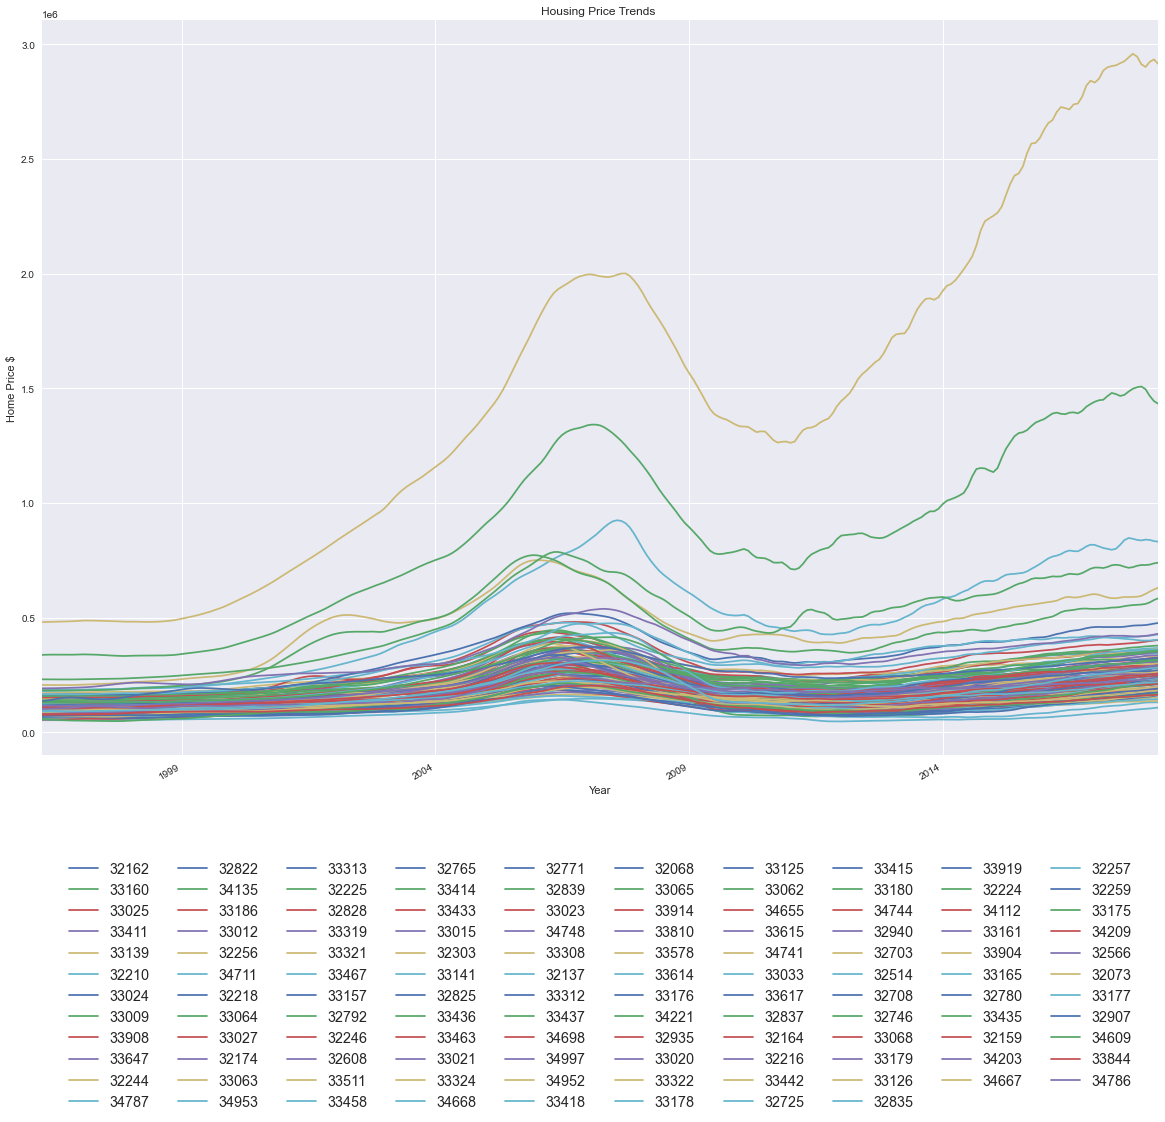

In [19]:
fl_df.plot(figsize=(20,15))
plt.title("Housing Price Trends ")
plt.xlabel('Year')
plt.ylabel('Home Price $')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5), ncol= 10, fontsize = 'x-large')
plt.gcf().autofmt_xdate()

* It is clear that most of the zipcodes has low volatility, but there are some that have noticable trendiness. The downfall in period from 2007 - 2012 had occured due to economic crash in Great Recession period. According to IG.Ellen, one of the truly distinctive features of Great Recession is the severe housing crisis layered on top of all the labor market problems (G.Ellen, 2012).  
After 2012 the market started to recover. 

### Select after 2012

In [20]:
#fl_df=fl_df.transpose()
#fl_df.head()

In [21]:
#fl_df.columns.get_loc('2012-01-01')

In [22]:
#fl_df.drop(fl_df.columns[:189], axis=1,inplace=True)
#fl_df.head()

In [23]:
#fl_df=fl_df.transpose()
#fl_df.head()

# Exploration Analysis

## Minimum Capital

### Medium Price as Investment Capital

* As per my project assumptions, I will calculate the **minimum amount of capital** that investors suppose to own. In order to determine that minimum amount, I will calculate the **average house prices for 2018 (4 months) and use the median price as a required capital.**

In [24]:
fl_df = fl_df.transpose()
fl_df.head()

1996-04-01  1996-05-01  1996-06-01  1996-07-01  1996-08-01  \
Zipcode                                                               
32162        101000      100700      100400      100100       99800   
33160        337300      337900      338300      338400      338400   
33025        111600      111700      111800      111900      112000   
33411        126800      126800      126800      126800      126700   
33139        480200      480700      481200      481600      482000   

         1996-09-01  1996-10-01  1996-11-01  1996-12-01  1997-01-01  \
Zipcode                                                               
32162         99500       99200       98900       98600       98000   
33160        338200      338000      338000      338400      339100   
33025        112100      112200      112300      112500      112700   
33411        126700      126800      126800      127000      127100   
33139        482500      483100      483700      484800      486100   

         1997-02-01  1997-03-01  1997-04-01  1997-05-01  1997-06-01  \
Zipcode                                                               
32162         97100       95800       94300       92800       91500   
33160        339400      339000      338500      337900      337000   
33025        112800      112700      112600      112500      112300   
33411        127200      127100      127000      127100      127200   
33139        486900      486900      486600      486300      485800   

         1997-07-01  1997-08-01  1997-09-01  1997-10-01  1997-11-01  \
Zipcode                                                               
32162         90500       89800       89500       89300       89400   
33160        335900      334800      333800      333000      332400   
33025        112200      112100      112100      112200      112400   
33411        127600      128000      128600      129300      130100   
33139        485100      484300      483500      482700      482000   

         1997-12-01  1998-01-01  1998-02-01  1998-03-01  1998-04-01  \
Zipcode                                                               
32162         89800       90500       91500       92700       94100   
33160        332600      333300      333800      333900      334000   
33025        112800      113400      114000      114300      114600   
33411        131100      132000      132900      133400      133800   
33139        481900      482100      482000      481400      481000   

         1998-05-01  1998-06-01  1998-07-01  1998-08-01  1998-09-01  \
Zipcode                                                               
32162         95700       97200       98400       99400      100300   
33160        334100      334200      334300      334500      334900   
33025        114900      115000      115100      115100      115200   
33411        134100      134300      134500      134500      134500   
33139        480900      481000      481500      482400      483800   

         1998-10-01  1998-11-01  1998-12-01  1999-01-01  1999-02-01  \
Zipcode                                                               
32162        101200      102400      104000      106000      108300   
33160        335600      336600      338500      341000      343400   
33025        115200      115300      115500      115900      116200   
33411        134600      134600      134700      134800      135000   
33139        485600      487900      491200      495100      498900   

         1999-03-01  1999-04-01  1999-05-01  1999-06-01  1999-07-01  \
Zipcode                                                               
32162        110700      113200      115700      117900      119700   
33160        345500      347800      350200      352600      355100   
33025        116400      116600      116800      116900      117000   
33411        135100      135400      135800      136200      136700   
33139        502600      506800      511400      516300      521600   

         1999-08-01  1999

In [25]:
fl_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 32162 to 34786
Columns: 265 entries, 1996-04-01 to 2018-04-01
dtypes: int64(265)
memory usage: 250.2+ KB


In [26]:
avg_price = (fl_df['2018-01-01'] + fl_df['2018-02-01'] + 
             fl_df['2018-03-01'] + fl_df['2018-04-01']) / 4
avg_price.head()

Zipcode
32162     248975.0
33160    1459550.0
33025     295325.0
33411     311800.0
33139    2917975.0
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc3a21d4eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc32064b5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc3a21d4b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc32064bc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc32064bf70>],
 'means': []}

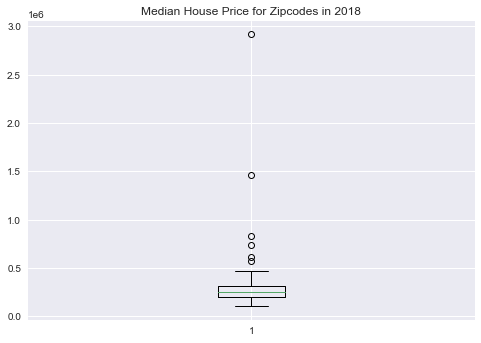

In [27]:
fig1, ax1 = plt.subplots()
ax1.set_title('Median House Price for Zipcodes in 2018')
ax1.boxplot(avg_price)



* The boxplot shows that at some zipcodes **the median price for the house is extremly high**. I will drop those zipcodes from the dataset, since they **represent outliers.**

In [28]:
zipcodes = avg_price.index[avg_price > 500000].to_list()
zipcodes

['33160', '33139', '33141', '33308', '33062', '33180']

In [29]:
fl_df.drop(zipcodes, inplace=True)
fl_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 32162 to 34786
Columns: 265 entries, 1996-04-01 to 2018-04-01
dtypes: int64(265)
memory usage: 232.8+ KB


In [30]:
avg_price.drop(zipcodes, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc3a19a44f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc3a19a4ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc3a19a4a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc3a1933c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc3a1933460>],
 'means': []}

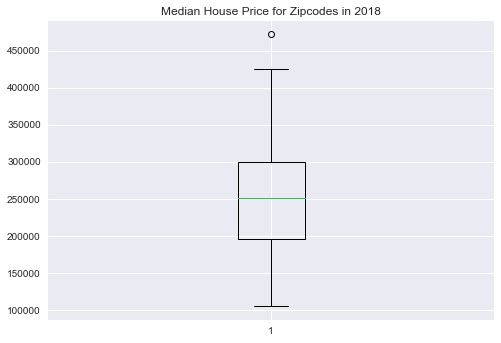

In [31]:
fig1, ax1 = plt.subplots()
ax1.set_title('Median House Price for Zipcodes in 2018')
ax1.boxplot(avg_price)


* The median house price for 4 months appears to be **\\$250,000.** To lower the threshold of entering the market, I will use **$200,000 as a minimum capital to invest.**
I will drop all zipcodes that have median price lower than \\$200,000

In [32]:
zipcodes = avg_price.index[avg_price < 200000].to_list()
fl_df.drop(zipcodes, inplace=True)
fl_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 32162 to 34786
Columns: 265 entries, 1996-04-01 to 2018-04-01
dtypes: int64(265)
memory usage: 170.4+ KB


In [33]:
fl_df.head()

1996-04-01  1996-05-01  1996-06-01  1996-07-01  1996-08-01  \
Zipcode                                                               
32162        101000      100700      100400      100100       99800   
33025        111600      111700      111800      111900      112000   
33411        126800      126800      126800      126800      126700   
33024         87100       87200       87200       87200       87300   
33009         79500       79500       79600       79700       79800   

         1996-09-01  1996-10-01  1996-11-01  1996-12-01  1997-01-01  \
Zipcode                                                               
32162         99500       99200       98900       98600       98000   
33025        112100      112200      112300      112500      112700   
33411        126700      126800      126800      127000      127100   
33024         87500       87700       88000       88300       88600   
33009         79900       80000       80300       80600       81000   

         1997-02-01  1997-03-01  1997-04-01  1997-05-01  1997-06-01  \
Zipcode                                                               
32162         97100       95800       94300       92800       91500   
33025        112800      112700      112600      112500      112300   
33411        127200      127100      127000      127100      127200   
33024         88900       89100       89200       89300       89300   
33009         81200       81400       81600       81700       81900   

         1997-07-01  1997-08-01  1997-09-01  1997-10-01  1997-11-01  \
Zipcode                                                               
32162         90500       89800       89500       89300       89400   
33025        112200      112100      112100      112200      112400   
33411        127600      128000      128600      129300      130100   
33024         89400       89400       89500       89600       89900   
33009         82000       82100       82200       82300       82500   

         1997-12-01  1998-01-01  1998-02-01  1998-03-01  1998-04-01  \
Zipcode                                                               
32162         89800       90500       91500       92700       94100   
33025        112800      113400      114000      114300      114600   
33411        131100      132000      132900      133400      133800   
33024         90200       90600       91000       91300       91500   
33009         82800       83100       83300       83400       83500   

         1998-05-01  1998-06-01  1998-07-01  1998-08-01  1998-09-01  \
Zipcode                                                               
32162         95700       97200       98400       99400      100300   
33025        114900      115000      115100      115100      115200   
33411        134100      134300      134500      134500      134500   
33024         91700       91800       92000       92100       92300   
33009         83500       83600       83700       83800       83900   

         1998-10-01  1998-11-01  1998-12-01  1999-01-01  1999-02-01  \
Zipcode                                                               
32162        101200      102400      104000      106000      108300   
33025        115200      115300      115500      115900      116200   
33411        134600      134600      134700      134800      135000   
33024         92500       92800       93300       93800       94200   
33009         84000       84300       84700       85200       85500   

         1999-03-01  1999-04-01  1999-05-01  1999-06-01  1999-07-01  \
Zipcode                                                               
32162        110700      113200      115700      117900      119700   
33025        116400      116600      116800      116900      117000   
33411        135100      135400      135800      136200      136700   
33024         94600       94900       95200       95500       95700   
33009         85800       86200       86600       87200       87700   

         1999-08-01  1999

## Volatility

### Explore the Volatility of the Market

* To filter out the **zipcodes with average risk for investment**, I will **calculate the volatility of prices at each zipcode**. Goal is to extract zipcodes that have averagre volatility, since **low volatility** means **less returns** and **high volatility** might be **too risky.**

Since **before 2012 the market had a housing bubble** and that fluctuation might affect the volatility results, I will use observations **only after 2012 to investigate the volatility.**

In [34]:
fl_df.columns.get_loc('2012-01-01')

189

In [35]:
fl_df_2012 = fl_df.drop(fl_df.columns[:189], axis=1)
fl_df_2012.head()

2012-01-01  2012-02-01  2012-03-01  2012-04-01  2012-05-01  \
Zipcode                                                               
32162        194300      194500      195300      196500      197900   
33025        161300      160600      159600      159400      160400   
33411        168300      168000      167900      168000      168600   
33024        130100      130100      130600      131400      132300   
33009        110800      110900      110100      108900      107900   

         2012-06-01  2012-07-01  2012-08-01  2012-09-01  2012-10-01  \
Zipcode                                                               
32162        199100      200000      200700      201600      202500   
33025        161200      161200      160300      160000      160000   
33411        168900      168500      168100      168200      168400   
33024        133000      133600      134000      134100      134100   
33009        107100      106200      105200      104100      102800   

         2012-11-01  2012-12-01  2013-01-01  2013-02-01  2013-03-01  \
Zipcode                                                               
32162        203600      204500      205100      205500      205900   
33025        160200      160400      160700      161400      163800   
33411        169400      171200      173200      175600      178200   
33024        134200      134900      135900      136800      138600   
33009        101700      101700      102600      103600      105400   

         2013-04-01  2013-05-01  2013-06-01  2013-07-01  2013-08-01  \
Zipcode                                                               
32162        206600      207800      209600      211500      213400   
33025        167500      170300      172100      173800      176700   
33411        181200      184700      188500      192400      196900   
33024        141400      144000      146800      149900      153300   
33009        109000      113500      117700      121100      124300   

         2013-09-01  2013-10-01  2013-11-01  2013-12-01  2014-01-01  \
Zipcode                                                               
32162        215200      217600      220300      223100      225400   
33025        179100      180300      181700      183200      183900   
33411        200900      204300      207200      209500      211600   
33024        155800      157500      159400      161400      162400   
33009        126600      127900      129400      131100      131700   

         2014-02-01  2014-03-01  2014-04-01  2014-05-01  2014-06-01  \
Zipcode                                                               
32162        227000      228200      229800      231600      233600   
33025        184800      185600      186100      187100      188800   
33411        214100      216800      219400      222500      226600   
33024        163600      165100      166100      167000      168600   
33009        132800      134600      136000      136900      138700   

         2014-07-01  2014-08-01  2014-09-01  2014-10-01  2014-11-01  \
Zipcode                                                               
32162        235700      237900      239500      240400      240900   
33025        191100      193800      195800      197500      199600   
33411        230600      233100      234300      235800      237500   
33024        170300      172000      173200      173800      174400   
33009        141400      143600      144400      144600      145100   

         2014-12-01  2015-01-01  2015-02-01  2015-03-01  2015-04-01  \
Zipcode                                                               
32162        241300      241800      242600      243400      244100   
33025        201900      204100      206600      209700      213200   
33411        239100      240400      242200      245000      247600   
33024        175700      177800      180700      182900      184500   
33009        145800      146600      147600      148700      149800   

         2015-05-01  2015

In [36]:
fl_df_2012=fl_df_2012.transpose()
fl_df_2012.head()

Zipcode      32162   33025   33411   33024   33009   33908   33647   34787  \
2012-01-01  194300  161300  168300  130100  110800  232200  218200  185700   
2012-02-01  194500  160600  168000  130100  110900  235000  217700  185700   
2012-03-01  195300  159600  167900  130600  110100  238500  217400  185200   
2012-04-01  196500  159400  168000  131400  108900  241500  217900  186000   
2012-05-01  197900  160400  168600  132300  107900  243900  218700  187700   

Zipcode      34135   33186   33012   32256   34711  33064   33027   32174  \
2012-01-01  226300  181300  160800  253100  148100  86500  256800  149700   
2012-02-01  229100  182300  159900  253600  150300  87100  258000  149900   
2012-03-01  231900  184000  160000  255000  152800  87000  258400  150400   
2012-04-01  233800  186100  160000  257300  154900  87100  258800  150500   
2012-05-01  235200  188100  159800  258900  156400  87800  260200  150700   

Zipcode      33063   34953  33313   32225   32828   33319   33321   33467  \
2012-01-01  133200   99700  93000  147300  166900   96800  112900  219100   
2012-02-01  134000  100000  93300  146400  167600   97300  112400  219000   
2012-03-01  134700  100100  93400  145300  168100   98700  112000  217600   
2012-04-01  135000  100800  93400  144900  168900   99900  112200  215000   
2012-05-01  135500  101700  93800  144700  170200  100300  112900  213800   

Zipcode      33157   32792   32608   33511   33458   32765   33414   33433  \
2012-01-01  152500  136400  194000  117100  235300  177900  232500  218100   
2012-02-01  152600  135300  193200  116800  237300  178100  233700  219900   
2012-03-01  153700  134300  191300  116800  238500  178200  233900  221400   
2012-04-01  155400  134500  189600  117100  239000  179300  233400  222500   
2012-05-01  156700  135400  188900  117600  239900  180600  233500  223900   

Zipcode      33015   32825   33436   33463   33021   33324   32771  33023  \
2012-01-01  179700  123500  165500  103300  185300  224200  117700  98700   
2012-02-01  178800  123800  165200  104000  185100  224800  117600  97600   
2012-03-01  178200  123900  165000  104900  186200  226100  117200  96900   
2012-04-01  177900  124200  164400  105200  187800  227000  116700  97600   
2012-05-01  178000  124400  163700  105200  189400  228200  116800  98900   

Zipcode      32137   33312   33437   34698   34997   33418   33065   33914  \
2012-01-01  133200  111000  226400  128800  160400  286200  202000  163900   
2012-02-01  133400  110700  226800  128600  161600  287600  202200  166300   
2012-03-01  134200  111200  225500  128000  162400  287800  202300  168200   
2012-04-01  135100  112300  223000  127400  163400  286600  202200  169600   
2012-05-01  136700  113700  220800  127600  165200  285500  202000  171000   

Zipcode      33176   34221   33020   33322   33178   33125   34655  33033  \
2012-01-01  312300  109900  101300  153500  311500  113100  152500  77200   
2012-02-01  314400  110300  102100  153800  313600  112300  153100  76700   
2012-03-01  316200  110100  102600  154300  317200  112600  154200  77300   
2012-04-01  317600  110200  103100  154500  321400  112900  155300  78500   
2012-05-01  318900  111200  103700  153900  325800  112600  156000  80000   

Zipcode      32837   33442   34744   32940   32708   32746  33068   33179  \
2012-01-01  146100  137000  112300  174800  159700  207500  90900  152700   
2012-02-01  145700  137600  112400  174600  159200  207900  90900  152900   
2012-03-01  145700  139300  113100  175700  158500  208500  91000  155400   
2012-04-01  146500  141000  114600  177600  159100  210300  91100  158200   
2012-05-01  147600  142300  116100  178800  160400  212300  91100  160700   

Zipcode      33126   32835   33919   32224   34112   33161   33904   33165  \
2012-01-01  136700  141700  160500  215700  183500  112600  146900  180700   
2012-02-01  136300  141000  162700  215500  183000  111500  148100  181200   
2012-03-01  137200  139700  164400  215800  

* To calculate Historical Volatility, I will **use standart deviation of log returns**. First, I will need to **calculate historical ROI for each zipcode.**

In [37]:
def log_roi (df):
    
    hist_df = pd.DataFrame(columns = df.columns)
    
    for col in df.columns:
        hist_df[col] = (np.log(df[col]/df[col].shift(-1)))
    return hist_df
        
        

In [38]:
log_roi_1 = log_roi(fl_df_2012)

In [39]:
log_roi_1

Zipcode        32162     33025     33411     33024     33009     33908  \
2012-01-01 -0.001029  0.004349  0.001784  0.000000 -0.000902 -0.011986   
2012-02-01 -0.004105  0.006246  0.000595 -0.003836  0.007240 -0.014784   
2012-03-01 -0.006126  0.001254 -0.000595 -0.006107  0.010959 -0.012500   
2012-04-01 -0.007099 -0.006254 -0.003565 -0.006826  0.009225 -0.009889   
2012-05-01 -0.006045 -0.004975 -0.001778 -0.005277  0.007442 -0.008980   
2012-06-01 -0.004510  0.000000  0.002371 -0.004501  0.008439 -0.009705   
2012-07-01 -0.003494  0.005599  0.002377 -0.002990  0.009461 -0.006418   
2012-08-01 -0.004474  0.001873 -0.000595 -0.000746  0.010511 -0.004787   
2012-09-01 -0.004454  0.000000 -0.001188  0.000000  0.012567 -0.007137   
2012-10-01 -0.005417 -0.001249 -0.005921 -0.000745  0.010758 -0.007479   
2012-11-01 -0.004411 -0.001248 -0.010570 -0.005203  0.000000 -0.003914   
2012-12-01 -0.002930 -0.001869 -0.011615 -0.007386 -0.008811 -0.005065   
2013-01-01 -0.001948 -0.004346 -0.013762 -0.006601 -0.009699 -0.007743   
2013-02-01 -0.001945 -0.014760 -0.014698 -0.013072 -0.017225 -0.006918   
2013-03-01 -0.003394 -0.022337 -0.016695 -0.020001 -0.033585 -0.004585   
2013-04-01 -0.005792 -0.016578 -0.019131 -0.018221 -0.040455 -0.003805   
2013-05-01 -0.008625 -0.010514 -0.020365 -0.019258 -0.036336 -0.005681   
2013-06-01 -0.009024 -0.009830 -0.020479 -0.020897 -0.028478 -0.009023   
2013-07-01 -0.008943 -0.016548 -0.023119 -0.022428 -0.026081 -0.010795   
2013-08-01 -0.008399 -0.013491 -0.020111 -0.016176 -0.018335 -0.011046   
2013-09-01 -0.011091 -0.006678 -0.016782 -0.010852 -0.010216 -0.012011   
2013-10-01 -0.012332 -0.007735 -0.014095 -0.011991 -0.011660 -0.008646   
2013-11-01 -0.012630 -0.008221 -0.011039 -0.012469 -0.013052 -0.004295   
2013-12-01 -0.010257 -0.003814 -0.009974 -0.006177 -0.004566 -0.001784   
2014-01-01 -0.007073 -0.004882 -0.011745 -0.007362 -0.008318 -0.002848   
2014-02-01 -0.005272 -0.004320 -0.012532 -0.009127 -0.013463 -0.005318   
2014-03-01 -0.006987 -0.002690 -0.011921 -0.006039 -0.010347 -0.006696   
2014-04-01 -0.007802 -0.005359 -0.014031 -0.005404 -0.006596 -0.006303   
2014-05-01 -0.008599 -0.009045 -0.018259 -0.009535 -0.013063 -0.006957   
2014-06-01 -0.008950 -0.012109 -0.017498 -0.010033 -0.019279 -0.005186   
2014-07-01 -0.009291 -0.014030 -0.010783 -0.009933 -0.015439 -0.005159   
2014-08-01 -0.006703 -0.010267 -0.005135 -0.006953 -0.005556 -0.006156   
2014-09-01 -0.003751 -0.008645 -0.006382 -0.003458 -0.001384 -0.005440   
2014-10-01 -0.002078 -0.010577 -0.007184 -0.003446 -0.003452 -0.006085   
2014-11-01 -0.001659 -0.011457 -0.006714 -0.007426 -0.004813 -0.009393   
2014-12-01 -0.002070 -0.010838 -0.005422 -0.011881 -0.005472 -0.008975   
2015-01-01 -0.003303 -0.012174 -0.007460 -0.016179 -0.006798 -0.008567   
2015-02-01 -0.003292 -0.014893 -0.011494 -0.012101 -0.007425 -0.008819   
2015-03-01 -0.002872 -0.016553 -0.010556 -0.008710 -0.007370 -0.007452   
2015-04-01 -0.001228 -0.014898 -0.006842 -0.010782 -0.008641 -0.007397   
2015-05-01  0.000819 -0.013312 -0.005201 -0.011197 -0.004622 -0.009249   
2015-06-01  0.001229 -0.013137 -0.005174 -0.010549 -0.002632 -0.010736   
2015-07-01 -0.003683 -0.011633 -0.005542 -0.013549 -0.009156 -0.011554   
2015-08-01 -0.011373 -0.008416 -0.008256 -0.014389 -0.014863 -0.008655   
2015-09-01 -0.010046 -0.006595 -0.009741 -0.012171 -0.014645 -0.004913   
2015-10-01 -0.003592 -0.008726 -0.009647 -0.011526 -0.016923 -0.006411   
2015-11-01 -0.002388 -0.009081 -0.012214 -0.011395 -0.014806 -0.007579   
2015-12-01 -0.001589 -0.009852 -0.012067 -0.011753 -0.009144 -0.009020   
2016-01-01  0.000000 -0.007220 -0.006724 -0.009208 -0.007857 -0.007158   
2016-02-01  0.002384 -0.004644 -0.003716 -0.008646 -0.012564 -0.001781   
2016-03-01  0.002788 -0.003784 -0.005548 -0.012358 -0.010645  0.002079   
2016-04-01  0.001996 -0.009605 -0.007716 -0.019182 -0.011114 -0.001782   
2016-05-01  0.004005 -0.014032 -0.006931 -0.019275 -0.016157 -0.007096   
2016

In [40]:
def std_roi(df):
    
    std_df = pd.DataFrame(columns = ['std'], index = df.columns)
    
    for col in df.columns:
        std_df.loc[[col],['std']] = np.std(df[col])
        #std_df.append(np.std(df[col]))
    return std_df
        

In [41]:
std_roi_1 = std_roi(log_roi_1)
std_roi_1

std
Zipcode            
32162    0.00433301
33025     0.0055471
33411    0.00550899
33024    0.00506929
33009     0.0110275
33908      0.004218
33647    0.00337472
34787    0.00504806
34135    0.00473434
33186    0.00434928
33012    0.00651601
32256    0.00473165
34711    0.00375566
33064    0.00612515
33027    0.00443819
32174    0.00423845
33063    0.00541125
34953    0.00515051
33313     0.0074729
32225    0.00588181
32828     0.0044368
33319    0.00730174
33321     0.0047375
33467    0.00478154
33157    0.00593192
32792    0.00664641
32608    0.00485058
33511    0.00463176
33458    0.00345422
32765    0.00554224
33414    0.00505038
33433    0.00403831
33015    0.00700042
32825     0.0048953
33436    0.00623222
33463    0.00646838
33021    0.00536972
33324    0.00517137
32771    0.00685481
33023    0.00681599
32137    0.00456394
33312    0.00656288
33437    0.00524797
34698    0.00533884
34997    0.00363093
33418    0.00379038
33065    0.00533299
33914    0.00519451
33176    0.00394117
34221    0.00429381
33020    0.00727249
33322    0.00610667
33178    0.00516536
33125    0.00941658
34655     0.0035248
33033    0.00490515
32837    0.00402935
33442    0.00426242
34744    0.00524375
32940    0.00331842
32708    0.00343359
32746     0.0032902
33068    0.00727843
33179    0.00930863
33126    0.00668832
32835    0.00631806
33919    0.00453695
32224    0.00457223
34112    0.00580424
33161    0.00835248
33904    0.00444051
33165     0.0051502
33435    0.00987796
32159    0.00482959
34203    0.00398892
32257    0.00463106
32259    0.00191795
33175    0.00463236
34209    0.00507385
32566    0.00402214
33177    0.00458263
34786    0.00376303

In [42]:
def annual_std(df):
    
    annual_df = pd.DataFrame(columns = ['annual_std', 'volatility'], index = df.index)
    
    for ind in df.index:
        #print(df['Name'][ind], df['Stream'][ind])
        annual_df.loc[[ind],['annual_std']] = df['std'][ind] * 12 **.5
        annual_df.loc[[ind],['volatility']] = round(df['std'][ind] * 12 **.5, 4)*100
    
    
    return annual_df

In [43]:
annual_s = annual_std(std_roi_1)

In [44]:
annual_s

annual_std volatility
Zipcode                       
32162       0.01501        1.5
33025     0.0192157       1.92
33411     0.0190837       1.91
33024     0.0175605       1.76
33009     0.0382004       3.82
33908     0.0146116       1.46
33647     0.0116904       1.17
34787      0.017487       1.75
34135     0.0164002       1.64
33186     0.0150664       1.51
33012     0.0225721       2.26
32256     0.0163909       1.64
34711       0.01301        1.3
33064     0.0212181       2.12
33027     0.0153743       1.54
32174     0.0146824       1.47
33063     0.0187451       1.87
34953     0.0178419       1.78
33313     0.0258869       2.59
32225     0.0203752       2.04
32828     0.0153695       1.54
33319      0.025294       2.53
33321     0.0164112       1.64
33467     0.0165638       1.66
33157     0.0205488       2.05
32792     0.0230238        2.3
32608     0.0168029       1.68
33511     0.0160449        1.6
33458     0.0119658        1.2
32765     0.0191989       1.92
33414      0.017495       1.75
33433     0.0139891        1.4
33015     0.0242502       2.43
32825     0.0169578        1.7
33436      0.021589       2.16
33463     0.0224071       2.24
33021     0.0186013       1.86
33324     0.0179142       1.79
32771     0.0237458       2.37
33023     0.0236113       2.36
32137       0.01581       1.58
33312     0.0227345       2.27
33437     0.0181795       1.82
34698     0.0184943       1.85
34997     0.0125779       1.26
33418     0.0131302       1.31
33065      0.018474       1.85
33914     0.0179943        1.8
33176     0.0136526       1.37
34221     0.0148742       1.49
33020     0.0251926       2.52
33322     0.0211541       2.12
33178     0.0178933       1.79
33125       0.03262       3.26
34655     0.0122103       1.22
33033     0.0169919        1.7
32837     0.0139581        1.4
33442     0.0147655       1.48
34744     0.0181649       1.82
32940     0.0114953       1.15
32708     0.0118943       1.19
32746     0.0113976       1.14
33068     0.0252132       2.52
33179      0.032246       3.22
33126      0.023169       2.32
32835     0.0218864       2.19
33919     0.0157164       1.57
32224     0.0158387       1.58
34112     0.0201065       2.01
33161     0.0289338       2.89
33904     0.0153824       1.54
33165     0.0178408       1.78
33435     0.0342183       3.42
32159     0.0167302       1.67
34203      0.013818       1.38
32257     0.0160425        1.6
32259    0.00664399       0.66
33175      0.016047        1.6
34209     0.0175763       1.76
32566     0.0139331       1.39
33177     0.0158747       1.59
34786     0.0130355        1.3

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc32004a670>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc32004aca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc3706a8f40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc32004a1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc392343100>],
 'means': []}

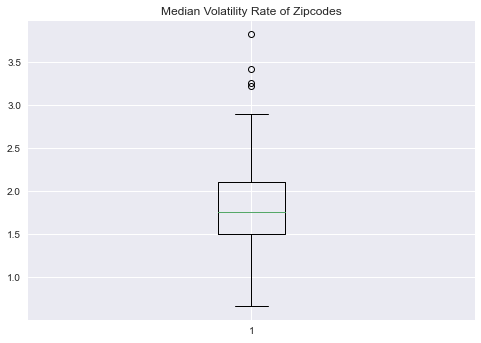

In [45]:
fig1, ax1 = plt.subplots()
ax1.set_title('Median Volatility Rate of Zipcodes')
ax1.boxplot(annual_s['volatility'])



* The graph shows that the **median value for volatility rate is around 1.7**. I will **keep zipcodes with volatility rate of 1.7-2.9.** based on project assumptions.

In [46]:
fl_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 32162 to 34786
Columns: 265 entries, 1996-04-01 to 2018-04-01
dtypes: int64(265)
memory usage: 172.9+ KB


In [47]:
zipcodes = annual_s.index[(annual_s['volatility'] <1.7) | (annual_s['volatility'] >2.8)].to_list()
fl_df.drop(zipcodes, inplace=True)
fl_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 33025 to 34209
Columns: 265 entries, 1996-04-01 to 2018-04-01
dtypes: int64(265)
memory usage: 81.0+ KB


## ROI of 24 Months

### Calculate the ROI for the last 24 months

For the purpose of the project, I will calculate the **average 24 months ROI percentage** of each zipcode, in order to find **zipcodes that have highest return.**

In [48]:
roi = ((fl_df['2018-04-01'] - fl_df['2017-04-01'])/fl_df['2017-04-01']) * 100
roi.sort_values(ascending=False)

Zipcode
33020    19.830827
33313    18.564103
33023    17.964946
33064    17.718191
33068    16.950053
34698    15.006582
33033    14.880333
33319    14.675592
33463    11.697575
33312    11.334474
32825    11.189802
33157    11.118833
32771     9.768908
34953     9.725051
33024     8.970233
33015     8.969776
34744     8.565737
34209     8.460237
33012     8.021571
33126     7.753336
33322     7.582770
33063     7.382283
33025     7.304786
33411     6.933060
32835     6.925323
32792     6.658076
33021     6.566891
34787     6.247878
33065     6.174699
33324     6.036745
32225     5.810259
32765     5.658324
33414     5.589715
33436     5.373574
34112     4.128114
33165     4.121037
33914     3.183792
33437    -0.126582
33178    -2.630309
dtype: float64

In [49]:
roi['33025']

7.304785894206549

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc39244ef70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc39244efa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc320679040>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc32067e6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc32067e940>],
 'means': []}

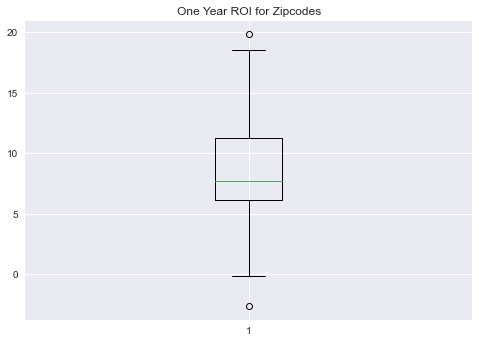

In [50]:
#roi.plot(style='.', figsize=(20,15))
fig1, ax1 = plt.subplots()
ax1.set_title('One Year ROI for Zipcodes')
ax1.boxplot(roi)


* The **median ROI** for the last 24 months of all zipcodes in Florida is **7%**, but since the project goal is to find best zipcodes to invest in, I will focus on those zipcodes, that have **return rate higher than upper quantile,** which is 9.5%

In [51]:
zipcodes = roi.index[roi <9.5].to_list()
fl_df.drop(zipcodes, inplace=True)
fl_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 33064 to 33068
Columns: 265 entries, 1996-04-01 to 2018-04-01
dtypes: int64(265)
memory usage: 29.1+ KB


In [52]:
fl_df = fl_df.transpose()
fl_df.head()

Zipcode     33064  34953  33313  33319   33157  32825  33463  32771  33023  \
1996-04-01  73400  59200  81500  84600  106400  96200  88800  89300  80300   
1996-05-01  73300  59100  81600  84500  106600  96200  88800  89700  80300   
1996-06-01  73300  58900  81700  84300  106800  96200  88700  90100  80400   
1996-07-01  73300  58800  81800  84200  107000  96200  88600  90400  80400   
1996-08-01  73300  58900  81800  84100  107100  96200  88500  90700  80500   

Zipcode     33312  34698  33020  33033  33068  
1996-04-01  81100  85800  76700  77100  82000  
1996-05-01  81000  85800  76700  77300  81900  
1996-06-01  81000  85700  76700  77400  81800  
1996-07-01  81000  85700  76700  77500  81700  
1996-08-01  81100  85800  76800  77600  81600

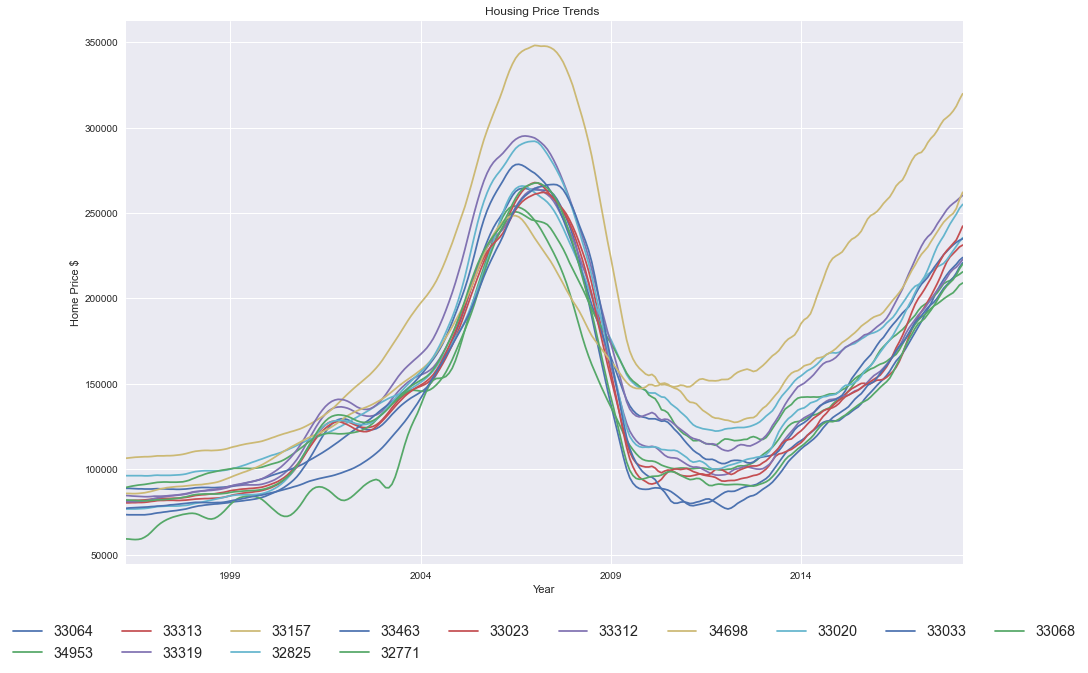

In [53]:
fl_df.plot(figsize=(15,10))
plt.title("Housing Price Trends ")
plt.xlabel('Year')
plt.ylabel('Home Price $')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol= 10, fontsize = 'x-large')
#plt.gcf().autofmt_xdate()

### Summary:

The datast had been cleaned out and filtered down as follows:
* Zipcodes of **Florida State** had been selected
* Zipcodes with **urbanization rank** in **top 15 quantile**
* The **minimum median price of housing is \\$200,000** for the last 4 months
* The **volatility range** of the median price is **1.7 - 2.9**
* The **ROI rate is greater than 9.5%**

The initial **amount of zipcodes** was reduced **from 14723 to 14.**

# Data Preparation

* Before proceeding to modeling I will check the **data stationarity and autocorrelation of the prices.**

## Stationarity of Data

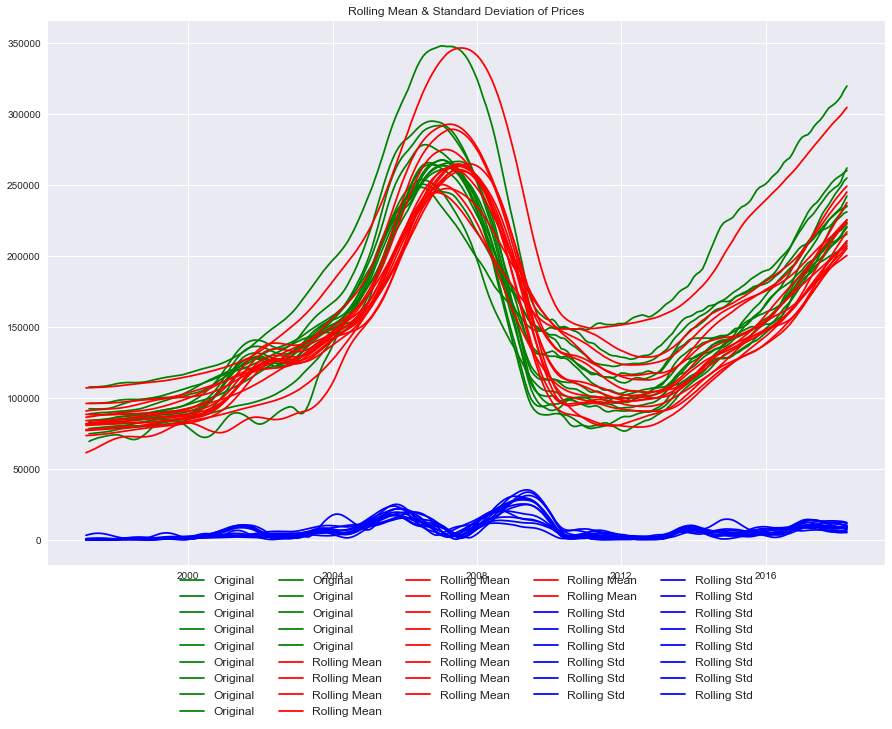

In [54]:
tsf.stationarity_test(fl_df, 12)

In [55]:
tsf.dickey_fuller_test(fl_df) # function stored in time_series_funtion file

[{'____': '___________________________',
  'zipcode': '33064',
  'test statistic': -2.2195761858969485,
  'pvalue': 0.19921730115419284,
  'usedlag': 7,
  'number of observations': 257,
  'critical values': {'1%': -3.4560535712549925,
   '5%': -2.8728527662442334,
   '10%': -2.5727985212493754},
  'best information criterion': 3542.2091982824695},
 {'____': '___________________________',
  'zipcode': '34953',
  'test statistic': -2.4940801712531577,
  'pvalue': 0.11692133524525378,
  'usedlag': 14,
  'number of observations': 250,
  'critical values': {'1%': -3.456780859712,
   '5%': -2.8731715065600003,
   '10%': -2.572968544},
  'best information criterion': 3666.3202509615276},
 {'____': '___________________________',
  'zipcode': '33313',
  'test statistic': -2.501570551457594,
  'pvalue': 0.11509266014417335,
  'usedlag': 12,
  'number of observations': 252,
  'critical values': {'1%': -3.4565688966099373,
   '5%': -2.8730786194395455,
   '10%': -2.5729189953388762},
  'best infor

* As the **Dickey- Fuller Test** shows, none of the **zipcodes'** data **do not meet stationarity assumption**. I will try different transformation merhods to **modify data before modeling.**

## Non Stationary to Stationary

### Differencing

* For now, I will work with 3 zipcodes and try **different methods to transform data to stationary**. After finding most suited method, I will use it on all zipcodes and **check if the stationarity assumption is met.**

In [56]:
tsf.find_best_difference(fl_df[['33064', '33313', '33319']], 6) # function stored in time_series_funtion file

0 nan
1 0.03162768003797077
2 0.14471861690937704
3 0.08474584275329894
4 0.16317824081589893
5 0.017526409003488855
0 nan
1 0.1134140634911413
2 0.05887693647425797
3 0.04556845571573169
4 0.15769182859821546
5 0.09390960695274292
0 nan
1 0.08031861053237288
2 0.17280335042297257
3 0.14218785977089854
4 0.13512969491703275
5 0.032464383305019835


* The function above shows p-values of 6 periods of differencing. It is clear that only **33064 zipcode** becomes non-stationary with 1 level of differencing. Next, I will work with **log transformation.**

### Log transform

In [57]:
three_zips = np.log(fl_df[['33064', '33313', '33319']].dropna())

In [58]:
tsf.dickey_fuller_test(three_zips)

[{'____': '___________________________',
  'zipcode': '33064',
  'test statistic': -2.9012224790252894,
  'pvalue': 0.04520602436559375,
  'usedlag': 13,
  'number of observations': 251,
  'critical values': {'1%': -3.4566744514553016,
   '5%': -2.8731248767783426,
   '10%': -2.5729436702592023},
  'best information criterion': -2266.587252645164},
 {'____': '___________________________',
  'zipcode': '33313',
  'test statistic': -2.350096341854503,
  'pvalue': 0.15631928962637248,
  'usedlag': 12,
  'number of observations': 252,
  'critical values': {'1%': -3.4565688966099373,
   '5%': -2.8730786194395455,
   '10%': -2.5729189953388762},
  'best information criterion': -2233.995877701043},
 {'____': '___________________________',
  'zipcode': '33319',
  'test statistic': -2.2723655911502822,
  'pvalue': 0.18103554691112578,
  'usedlag': 9,
  'number of observations': 255,
  'critical values': {'1%': -3.4562572510874396,
   '5%': -2.8729420379793598,
   '10%': -2.5728461399461744},
  

* Log transformation **didn't** appear to **make the data stationary**, since the critical value assumption is only met by one zipcode.

### Differencing logg transformed zipcodes

In [59]:
tsf.find_best_difference(three_zips.dropna(), 6)

0 nan
1 0.036700197276750515
2 0.2011029365214554
3 0.10942521929812965
4 0.22697007054568014
5 0.057878580751738205
0 nan
1 0.13677291546370052
2 0.16178733287298686
3 0.19776435135800025
4 0.28643966990396785
5 0.15210705754629333
0 nan
1 0.1736056647857369
2 0.20481627601636854
3 0.2821091655405571
4 0.2625565307561377
5 0.10789476086548644


### Second order differencing on log transformed data

In [60]:
tsf.dickey_fuller_test(three_zips.diff().diff().dropna())

[{'____': '___________________________',
  'zipcode': '33064',
  'test statistic': -5.5407728530392175,
  'pvalue': 1.7037024365755172e-06,
  'usedlag': 11,
  'number of observations': 251,
  'critical values': {'1%': -3.4566744514553016,
   '5%': -2.8731248767783426,
   '10%': -2.5729436702592023},
  'best information criterion': -2238.1466811885803},
 {'____': '___________________________',
  'zipcode': '33313',
  'test statistic': -5.815341677756961,
  'pvalue': 4.3055574968634216e-07,
  'usedlag': 10,
  'number of observations': 252,
  'critical values': {'1%': -3.4565688966099373,
   '5%': -2.8730786194395455,
   '10%': -2.5729189953388762},
  'best information criterion': -2206.9281841201705},
 {'____': '___________________________',
  'zipcode': '33319',
  'test statistic': -6.1878155667883155,
  'pvalue': 6.227278178612652e-08,
  'usedlag': 7,
  'number of observations': 255,
  'critical values': {'1%': -3.4562572510874396,
   '5%': -2.8729420379793598,
   '10%': -2.57284613994

* The **second order differencing** appears to be the **best choice to transform data to stationary**. All three zipcodes have met the critical value assumption, even though the p-values are high.

## Transformation of Whole Dataset

* Now, I will try to use **second order differencing without log transformation** on all dataset.

In [61]:
tsf.dickey_fuller_test(fl_df.diff().diff().dropna())

[{'____': '___________________________',
  'zipcode': '33064',
  'test statistic': -4.444380330050281,
  'pvalue': 0.00024751454353030947,
  'usedlag': 11,
  'number of observations': 251,
  'critical values': {'1%': -3.4566744514553016,
   '5%': -2.8731248767783426,
   '10%': -2.5729436702592023},
  'best information criterion': 3525.361886600041},
 {'____': '___________________________',
  'zipcode': '34953',
  'test statistic': -4.781518064256639,
  'pvalue': 5.899072518256892e-05,
  'usedlag': 12,
  'number of observations': 250,
  'critical values': {'1%': -3.456780859712,
   '5%': -2.8731715065600003,
   '10%': -2.572968544},
  'best information criterion': 3646.6874386610693},
 {'____': '___________________________',
  'zipcode': '33313',
  'test statistic': -4.91325873749617,
  'pvalue': 3.286012440149408e-05,
  'usedlag': 10,
  'number of observations': 252,
  'critical values': {'1%': -3.4565688966099373,
   '5%': -2.8730786194395455,
   '10%': -2.5729189953388762},
  'best i

 * **All zipcodes have met the critical value assumption**, but **only 8 out of 12 zipcodes** have **met the p-value parameter**. I will explore the results for log transformed data.

In [62]:
tsf.dickey_fuller_test(np.log(fl_df).diff().diff().dropna())

[{'____': '___________________________',
  'zipcode': '33064',
  'test statistic': -5.5407728530392175,
  'pvalue': 1.7037024365755172e-06,
  'usedlag': 11,
  'number of observations': 251,
  'critical values': {'1%': -3.4566744514553016,
   '5%': -2.8731248767783426,
   '10%': -2.5729436702592023},
  'best information criterion': -2238.1466811885803},
 {'____': '___________________________',
  'zipcode': '34953',
  'test statistic': -7.618911069179248,
  'pvalue': 2.154506347565698e-11,
  'usedlag': 10,
  'number of observations': 252,
  'critical values': {'1%': -3.4565688966099373,
   '5%': -2.8730786194395455,
   '10%': -2.5729189953388762},
  'best information criterion': -2132.260437025537},
 {'____': '___________________________',
  'zipcode': '33313',
  'test statistic': -5.815341677756961,
  'pvalue': 4.3055574968634216e-07,
  'usedlag': 10,
  'number of observations': 252,
  'critical values': {'1%': -3.4565688966099373,
   '5%': -2.8730786194395455,
   '10%': -2.572918995338

* Clearly, the **best option** for transformation is **second order differencing of data without log transforming** it. For further analysis I will **keep working with & zipcodes that have met critical value assumption and p-value parameter.**

In [63]:
df_fl = fl_df[['33064', '33157', '32825', '32771', '33463','34698', '33020','33033']].diff().diff()
df_fl.dropna(inplace = True)
df_fl

Zipcode      33064   33157   32825   32771   33463   34698   33020   33033
1996-06-01   100.0     0.0     0.0     0.0  -100.0  -100.0     0.0  -100.0
1996-07-01     0.0     0.0     0.0  -100.0     0.0   100.0     0.0     0.0
1996-08-01     0.0  -100.0     0.0     0.0     0.0   100.0   100.0     0.0
1996-09-01     0.0     0.0     0.0  -100.0   100.0   100.0     0.0     0.0
1996-10-01     0.0     0.0  -100.0     0.0  -100.0     0.0     0.0     0.0
1996-11-01   200.0  -100.0   100.0   100.0   100.0   200.0   100.0     0.0
1996-12-01     0.0   100.0   100.0     0.0     0.0     0.0   100.0   100.0
1997-01-01   200.0   100.0   100.0     0.0   100.0   100.0     0.0  -100.0
1997-02-01  -100.0     0.0  -100.0     0.0     0.0     0.0     0.0   100.0
1997-03-01  -100.0  -200.0  -200.0  -200.0  -200.0     0.0  -200.0  -100.0
1997-04-01   100.0     0.0   100.0     0.0   100.0  -200.0     0.0     0.0
1997-05-01  -100.0   100.0     0.0  -100.0  -100.0   100.0     0.0   100.0
1997-06-01   100.0  -100.0     0.0  -100.0     0.0  -200.0  -100.0   100.0
1997-07-01  -100.0   100.0   100.0   100.0   100.0     0.0     0.0  -200.0
1997-08-01     0.0   100.0     0.0     0.0  -100.0     0.0     0.0   100.0
1997-09-01   100.0     0.0     0.0   100.0   100.0  -100.0   100.0     0.0
1997-10-01     0.0   100.0   100.0     0.0   100.0     0.0   100.0     0.0
1997-11-01     0.0   100.0   100.0   300.0     0.0   100.0  -100.0     0.0
1997-12-01   200.0   100.0   200.0   100.0   100.0     0.0   200.0     0.0
1998-01-01     0.0     0.0     0.0   300.0     0.0     0.0   200.0     0.0
1998-02-01  -100.0  -100.0  -100.0  -100.0   100.0     0.0  -100.0     0.0
1998-03-01     0.0  -200.0  -200.0   100.0  -200.0  -100.0  -100.0  -200.0
1998-04-01  -200.0     0.0     0.0  -200.0     0.0     0.0   100.0  -100.0
1998-05-01   100.0  -100.0  -100.0   100.0  -100.0   200.0     0.0   100.0
1998-06-01  -100.0  -100.0  -100.0  -100.0     0.0  -100.0     0.0  -100.0
1998-07-01     0.0  -100.0     0.0  -200.0  -100.0   100.0     0.0   100.0
1998-08-01     0.0   200.0     0.0     0.0   100.0     0.0     0.0     0.0
1998-09-01  -100.0     0.0     0.0     0.0   100.0   100.0     0.0   100.0
1998-10-01   100.0   100.0     0.0     0.0     0.0   200.0     0.0  -100.0
1998-11-01     0.0   100.0   200.0  -100.0     0.0   100.0     0.0   200.0
1998-12-01     0.0   100.0   100.0     0.0   100.0     0.0   100.0   100.0
1999-01-01   100.0   200.0   100.0     0.0   100.0     0.0  -100.0   100.0
1999-02-01     0.0  -100.0   100.0     0.0   100.0   100.0  -100.0     0.0
1999-03-01  -100.0  -100.0  -100.0  -300.0  -100.0  -100.0  -100.0  -200.0
1999-04-01     0.0   100.0   200.0     0.0   100.0     0.0  -100.0   200.0
1999-05-01     0.0  -100.0     0.0     0.0     0.0     0.0  -100.0     0.0
1999-06-01   100.0     0.0     0.0     0.0     0.0  -100.0   100.0     0.0
1999-07-01  -100.0  -100.0   100.0  -100.0   100.0   100.0  -100.0     0.0
1999-08-01   100.0     0.0     0.0   100.0  -100.0   100.0     0.0     0.0
1999-09-01     0.0     0.0  -100.0   200.0     0.0  -100.0   100.0  -100.0
1999-10-01   100.0     0.0   100.0   100.0   100.0   100.0   100.0     0.0
1999-11-01   100.0   100.0  -100.0     0.0   100.0   100.0   100.0     0.0
1999-12-01   100.0   200.0   100.0   300.0     0.0   100.0   200.0   100.0
2000-01-01   200.0     0.0     0.0     0.0   100.0   100.0   200.0   100.0
2000-02-01     0.0   100.0     0.0     0.0     0.0     0.0   100.0  -100.0
2000-03-01     0.0  -100.0  -200.0  -100.0  -100.0   100.0   200.0     0.0
2000-04-01     0.0   100.0   100.0     0.0     0.0     0.0   100.0   100.0
2000-05-01   200.0  -100.0     0.0   200.0     0.0     0.0   300.0     0.0
2000-06-01   100.0     0.0   200.0   200.0     0.0     0.0   200.0     0.0
2000-07-01   200.0  -100.0  -100.0   200.0     0.0  -100.0   300.0     0.0
2000-08-01   100.0   100.0   200.0   100.0     0.0     0.0   200.0     0.0
2000-09-01   200.0  -100.0  -100.0   100.0   100.0  -100.0   300.0   100.0
2000-10-01   300.0   100.

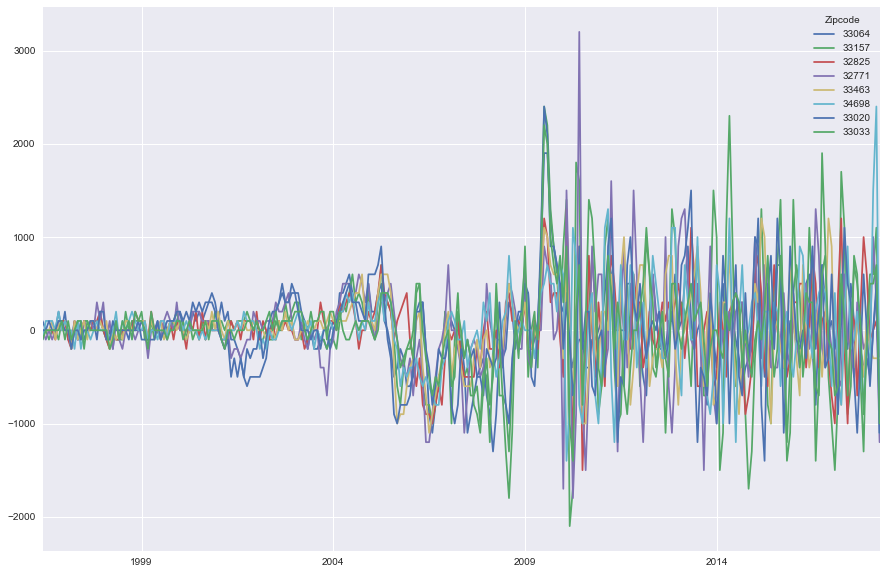

In [64]:
df_fl.plot(figsize=(15,10))

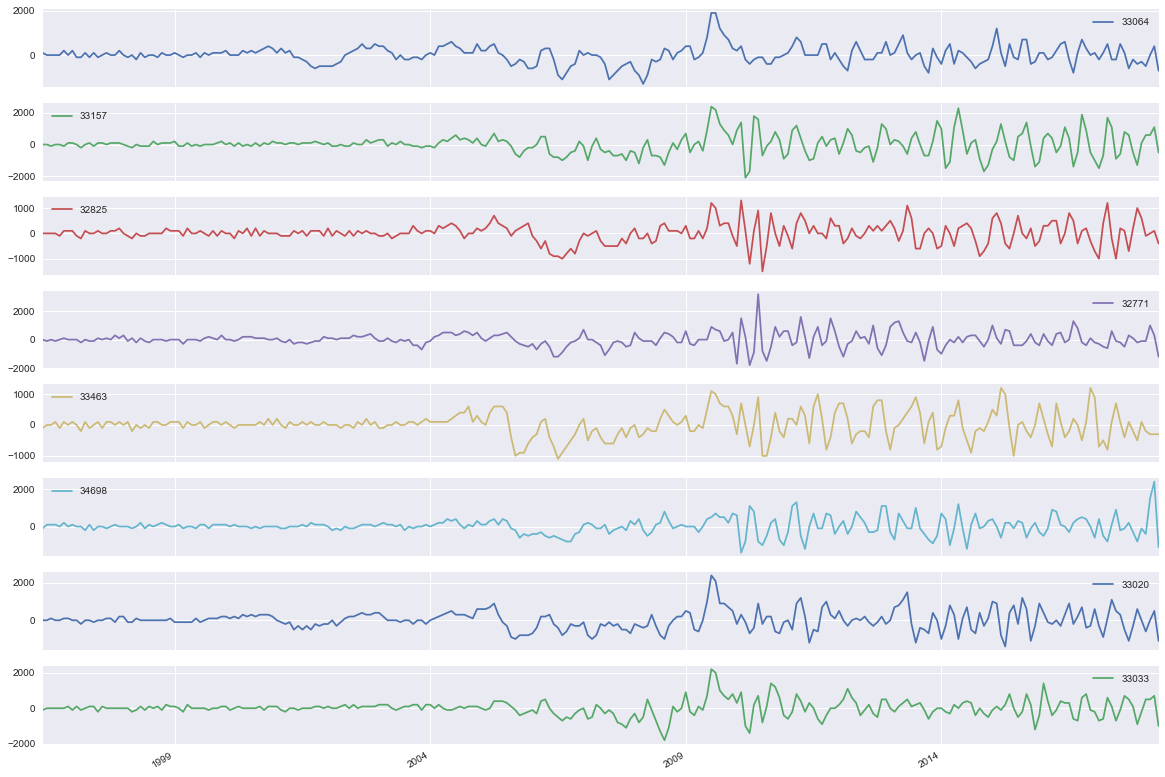

In [65]:
df_fl.plot(figsize = (20,15), subplots=True, legend=True)
plt.show()

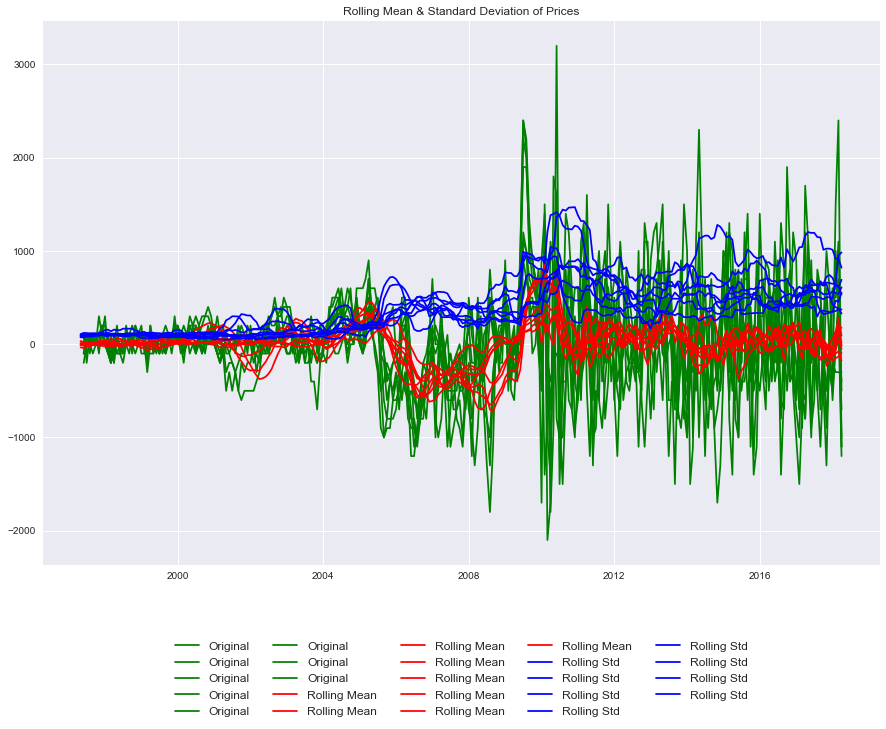

In [66]:
tsf.stationarity_test(df_fl, 12)

**Final Dataset for Modeling**

In [67]:
df_final = df_fl.copy()
df_final.head()

Zipcode     33064  33157  32825  32771  33463  34698  33020  33033
1996-06-01  100.0    0.0    0.0    0.0 -100.0 -100.0    0.0 -100.0
1996-07-01    0.0    0.0    0.0 -100.0    0.0  100.0    0.0    0.0
1996-08-01    0.0 -100.0    0.0    0.0    0.0  100.0  100.0    0.0
1996-09-01    0.0    0.0    0.0 -100.0  100.0  100.0    0.0    0.0
1996-10-01    0.0    0.0 -100.0    0.0 -100.0    0.0    0.0    0.0

## ACF and PACF

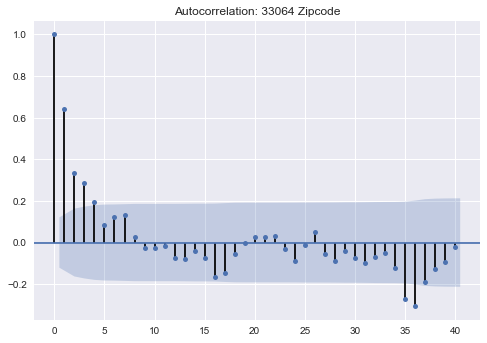

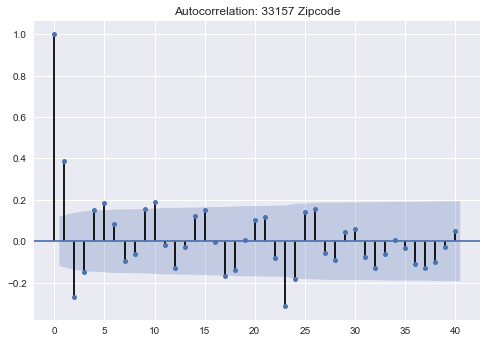

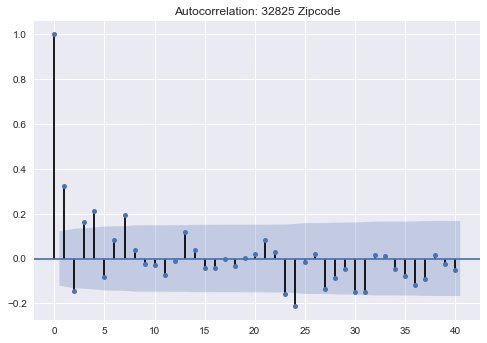

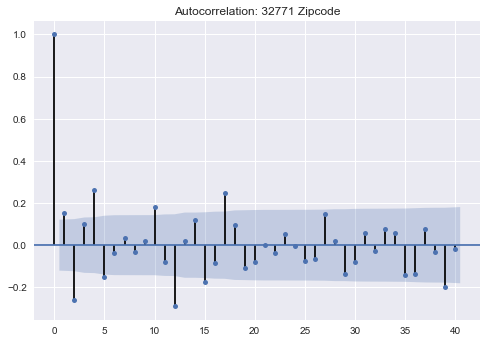

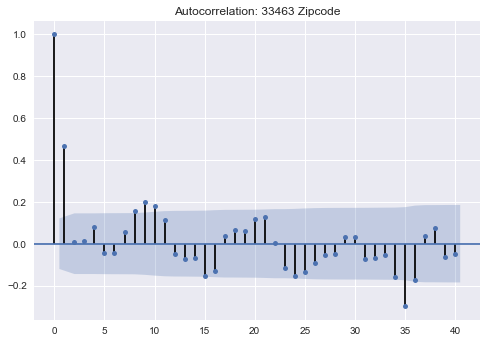

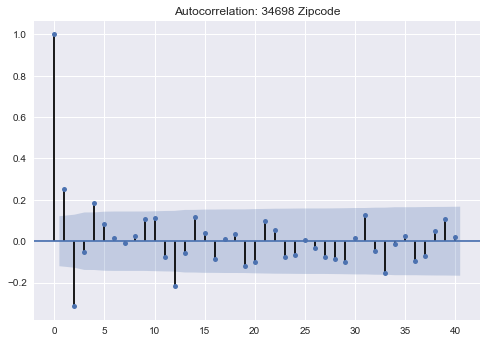

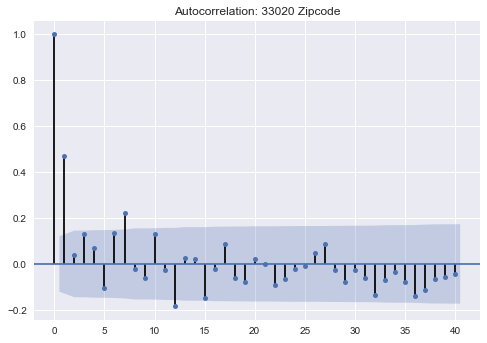

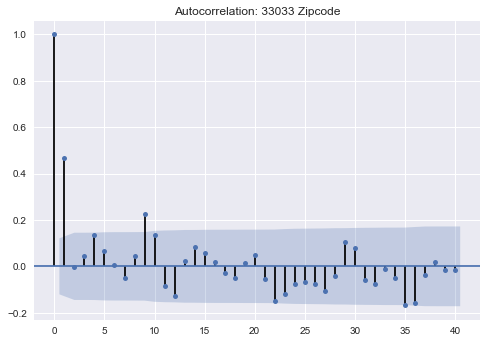

In [68]:
#plt.figure(figsize=(12,6))

for col in df_final.columns:
    title = 'Autocorrelation: '+ col + ' Zipcode'
    lags = 40
    plot_acf(df_final[col],title=title,lags=lags)
    #plt.figure(figsize=(15,3))
    #pd.plotting.autocorrelation_plot(df_final[col]);

The graphs show that the **median prices** of houses are **significantly correlated for first lag** for most of the zipcodes and I can notice that all zipcodes have **negative correlation at different lags.**

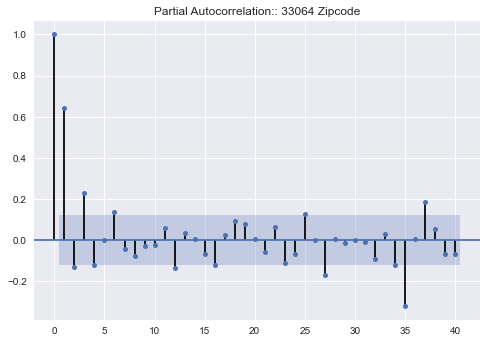

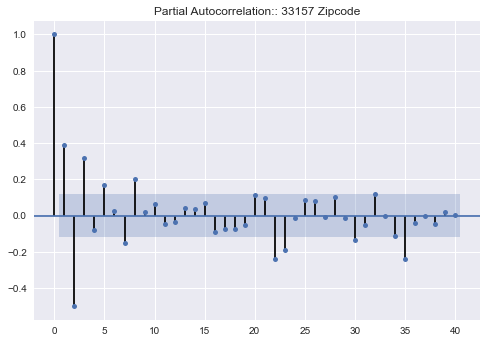

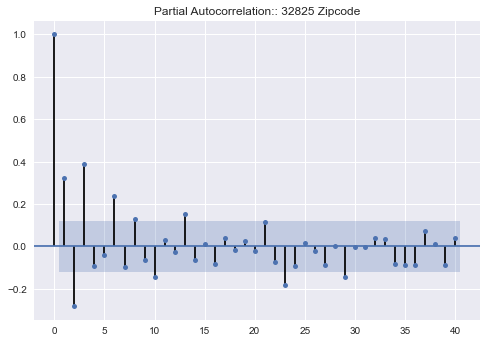

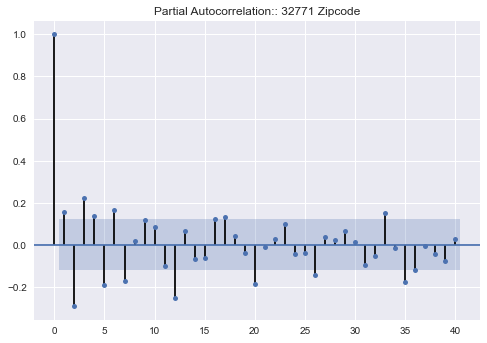

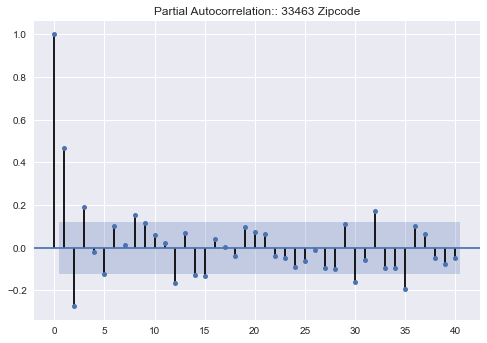

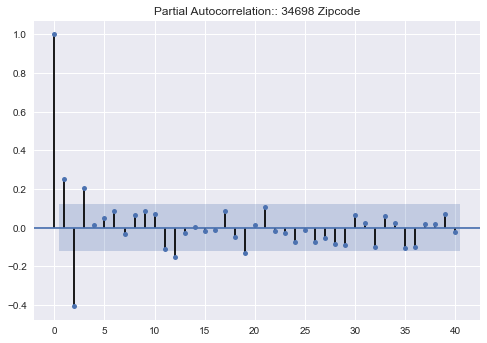

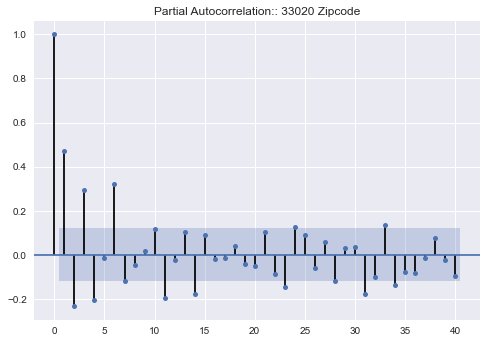

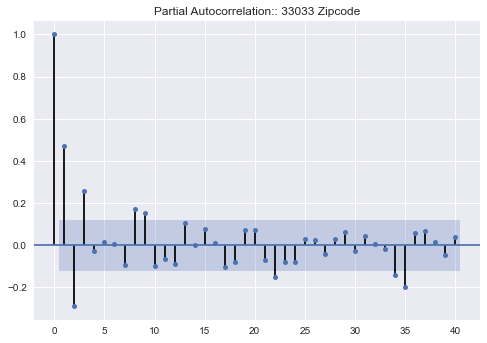

In [69]:
for col in df_final.columns:
    title = 'Partial Autocorrelation:: '+ col + ' Zipcode'
    lags = 40
    plot_pacf(df_final[col],title=title,lags=lags)


# Baseline ARIMA Model

## Train Test Split

In [70]:
df_final.head()

Zipcode     33064  33157  32825  32771  33463  34698  33020  33033
1996-06-01  100.0    0.0    0.0    0.0 -100.0 -100.0    0.0 -100.0
1996-07-01    0.0    0.0    0.0 -100.0    0.0  100.0    0.0    0.0
1996-08-01    0.0 -100.0    0.0    0.0    0.0  100.0  100.0    0.0
1996-09-01    0.0    0.0    0.0 -100.0  100.0  100.0    0.0    0.0
1996-10-01    0.0    0.0 -100.0    0.0 -100.0    0.0    0.0    0.0

* To proceed with modeling, I will create **8 separate datasets** with **time as index and median price as value.**

In [71]:
df_33064 = pd.DataFrame(df_final['33064'])
df_33064.index.name = 'time'
df_33157 = pd.DataFrame(df_final['33157'])
df_33157.index.name = 'time'
df_32825 = pd.DataFrame(df_final['32825'])
df_32825.index.name = 'time'
df_33463 = pd.DataFrame(df_final['33463'])
df_33463.index.name = 'time'
df_34698 = pd.DataFrame(df_final['34698'])
df_34698.index.name = 'time'
df_33020 = pd.DataFrame(df_final['33020'])
df_33020.index.name = 'time'
df_33033 = pd.DataFrame(df_final['33033'])
df_33033.index.name = 'time'
df_32771 = pd.DataFrame(df_final['32771'])
df_32771.index.name = 'time'



* The holdout set will be 20% of the data, the test set will consist of 20% of 80% that was left for trainig.

In [72]:
train_1,test_1,hold_1 = ed.train_test_holdout_split(df_33064.dropna())
train_2,test_2,hold_2 = ed.train_test_holdout_split(df_33157.dropna())
train_3,test_3,hold_3 = ed.train_test_holdout_split(df_32825.dropna())
train_4,test_4,hold_4 = ed.train_test_holdout_split(df_33463.dropna())
train_5,test_5,hold_5 = ed.train_test_holdout_split(df_34698.dropna())
train_6,test_6,hold_6 = ed.train_test_holdout_split(df_33020.dropna())
train_7,test_7,hold_7 = ed.train_test_holdout_split(df_33033.dropna())
train_8,test_8,hold_8 = ed.train_test_holdout_split(df_32771.dropna())

# Auto - ARIMA for all Zipcodes

In [73]:
# create dataframe to store models' parameters
metrics = pd.DataFrame(columns = ['Order', 'AIC', 'Testing RMSE'], index = df_final.columns)

## 33064 Zipcode Model

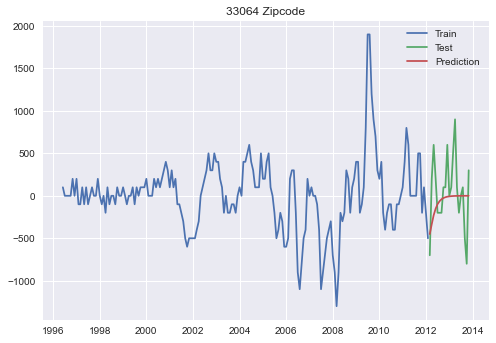

Testing RMSE =  421.49434698177026


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  189
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1302.977
Date:                Sat, 11 Sep 2021   AIC                           2611.954
Time:                        11:15:55   BIC                           2621.680
Sample:                             0   HQIC                          2615.894
                                - 189                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9904      0.068     14.659      0.000       0.858       1.123
ar.L2         -0.2250      0.075     -2.981      0.003      -0.373      -0.077
sigma2      5.717e+04   5182.907     11.030      0.000     4.7e+04    6.73e+04
===================================================================================
Ljung-Box (Q):                       85.41   Jarque-Bera (JB):                60.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.68   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
model_1 = auto_arima(train_1,seasonal=True)
tsf.evaluate_auto_arima(model_1, train_1, test_1, metrics)

## 33157 Zipcode Model

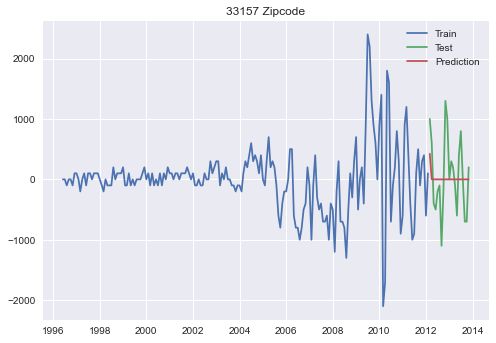

Testing RMSE =  594.1009811178756


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  189
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1415.500
Date:                Sat, 11 Sep 2021   AIC                           2834.999
Time:                        11:15:56   BIC                           2841.483
Sample:                             0   HQIC                          2837.626
                                - 189                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7451      0.040     18.560      0.000       0.666       0.824
sigma2      1.866e+05   9628.557     19.375      0.000    1.68e+05    2.05e+05
===================================================================================
Ljung-Box (Q):                       77.02   Jarque-Bera (JB):               448.45
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              15.80   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
model_2 = auto_arima(train_2,seasonal=True)
tsf.evaluate_auto_arima(model_2, train_2, test_2, metrics)

## 32825 Zipcode Model

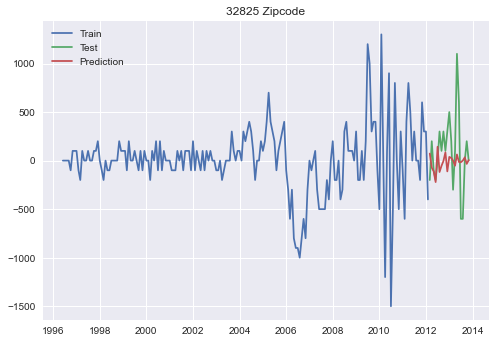

Testing RMSE =  390.02367798650573


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  189
Model:               SARIMAX(5, 0, 1)   Log Likelihood               -1323.361
Date:                Sat, 11 Sep 2021   AIC                           2660.723
Time:                        11:15:59   BIC                           2683.415
Sample:                             0   HQIC                          2669.916
                                - 189                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0575      0.152     -0.379      0.705      -0.355       0.240
ar.L2          0.1202      0.076      1.591      0.112      -0.028       0.268
ar.L3          0.2980      0.061      4.858      0.000       0.178       0.418
ar.L4          0.3379      0.082      4.127      0.000       0.177       0.498
ar.L5         -0.3513      0.060     -5.862      0.000      -0.469      -0.234
ma.L1          0.5356      0.155      3.454      0.001       0.232       0.840
sigma2      7.001e+04   4895.308     14.302      0.000    6.04e+04    7.96e+04
===================================================================================
Ljung-Box (Q):                       45.10   Jarque-Bera (JB):               132.05
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               8.48   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
model_3 = auto_arima(train_3,seasonal=True)
tsf.evaluate_auto_arima(model_3, train_3, test_3, metrics)

## 33463 Zipcode Model

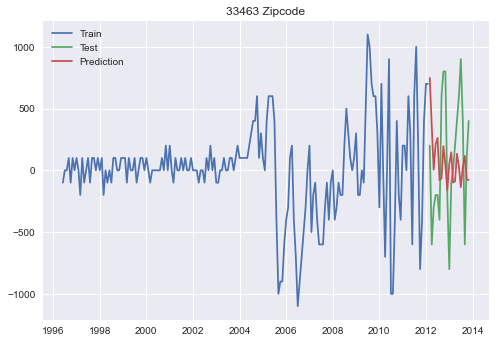

Testing RMSE =  553.8011715179757


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  189
Model:               SARIMAX(3, 0, 2)   Log Likelihood               -1332.026
Date:                Sat, 11 Sep 2021   AIC                           2676.052
Time:                        11:16:03   BIC                           2695.502
Sample:                             0   HQIC                          2683.931
                                - 189                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2313      0.097      2.393      0.017       0.042       0.421
ar.L2         -0.6704      0.050    -13.541      0.000      -0.767      -0.573
ar.L3          0.6032      0.068      8.909      0.000       0.470       0.736
ma.L1          0.4602      0.089      5.162      0.000       0.285       0.635
ma.L2          0.7984      0.082      9.705      0.000       0.637       0.960
sigma2      8.214e+04   6598.635     12.448      0.000    6.92e+04    9.51e+04
===================================================================================
Ljung-Box (Q):                       41.72   Jarque-Bera (JB):               134.04
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):              10.54   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
model_4 = auto_arima(train_4,seasonal=True)
tsf.evaluate_auto_arima(model_4, train_4, test_4, metrics)

## 34698 Zipcode Model

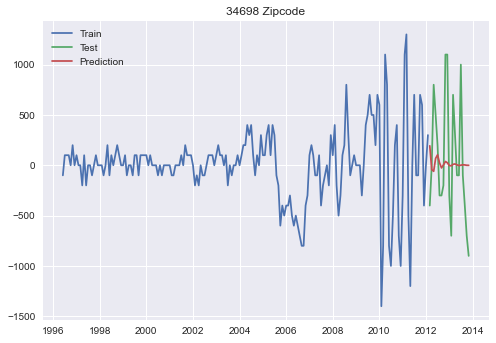

Testing RMSE =  594.2181838763728


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  189
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -1330.281
Date:                Sat, 11 Sep 2021   AIC                           2670.562
Time:                        11:16:04   BIC                           2686.771
Sample:                             0   HQIC                          2677.129
                                - 189                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0903      0.128      8.544      0.000       0.840       1.340
ar.L2         -0.8463      0.092     -9.176      0.000      -1.027      -0.666
ar.L3          0.5034      0.057      8.838      0.000       0.392       0.615
ma.L1         -0.4080      0.150     -2.712      0.007      -0.703      -0.113
sigma2      7.561e+04   5322.697     14.205      0.000    6.52e+04     8.6e+04
===================================================================================
Ljung-Box (Q):                       34.93   Jarque-Bera (JB):               258.53
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               9.81   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
model_5 = auto_arima(train_5,seasonal=True)
tsf.evaluate_auto_arima(model_5, train_5, test_5, metrics)

## 33020 Zipcode Model

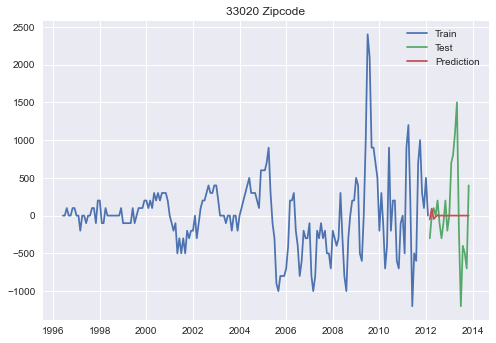

Testing RMSE =  595.612927447859


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  189
Model:               SARIMAX(1, 0, 4)   Log Likelihood               -1357.175
Date:                Sat, 11 Sep 2021   AIC                           2726.350
Time:                        11:16:09   BIC                           2745.801
Sample:                             0   HQIC                          2734.230
                                - 189                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4813      0.103     -4.680      0.000      -0.683      -0.280
ma.L1          1.4106      0.096     14.720      0.000       1.223       1.598
ma.L2          0.9276      0.114      8.159      0.000       0.705       1.150
ma.L3          0.4589      0.098      4.693      0.000       0.267       0.651
ma.L4          0.3355      0.063      5.334      0.000       0.212       0.459
sigma2          1e+05   6088.283     16.430      0.000    8.81e+04    1.12e+05
===================================================================================
Ljung-Box (Q):                       42.25   Jarque-Bera (JB):               219.52
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):              14.88   Skew:                             0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
model_6 = auto_arima(train_6,seasonal=True)
tsf.evaluate_auto_arima(model_6, train_6, test_6, metrics)

## 33033 Zipcode Model

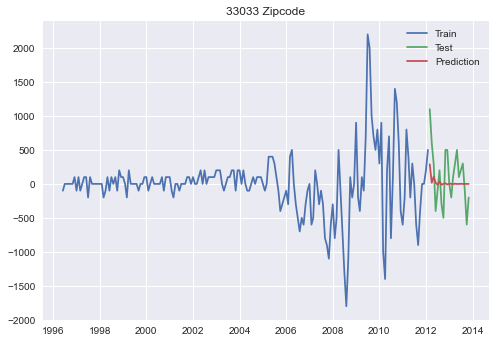

Testing RMSE =  379.3679923572339


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  189
Model:               SARIMAX(3, 0, 2)   Log Likelihood               -1369.656
Date:                Sat, 11 Sep 2021   AIC                           2751.312
Time:                        11:16:12   BIC                           2770.763
Sample:                             0   HQIC                          2759.192
                                - 189                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5496      0.088     -6.235      0.000      -0.722      -0.377
ar.L2         -0.0662      0.071     -0.928      0.353      -0.206       0.074
ar.L3          0.2682      0.089      3.000      0.003       0.093       0.443
ma.L1          1.4238      0.091     15.624      0.000       1.245       1.602
ma.L2          0.7839      0.069     11.406      0.000       0.649       0.919
sigma2      1.146e+05   6671.153     17.178      0.000    1.02e+05    1.28e+05
===================================================================================
Ljung-Box (Q):                       40.08   Jarque-Bera (JB):               279.24
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):              13.65   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
model_7 = auto_arima(train_7,seasonal=True)
tsf.evaluate_auto_arima(model_7, train_7, test_7, metrics)

## 32771 Zipcode Model

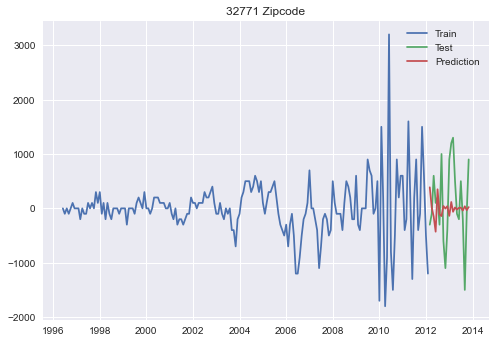

Testing RMSE =  765.0109124156693


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  189
Model:               SARIMAX(5, 0, 3)   Log Likelihood               -1417.504
Date:                Sat, 11 Sep 2021   AIC                           2855.008
Time:                        11:16:17   BIC                           2887.425
Sample:                             0   HQIC                          2868.141
                                - 189                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.5862    116.833     -0.022      0.982    -231.575     226.403
ar.L1         -1.2321      0.215     -5.728      0.000      -1.654      -0.811
ar.L2         -0.4826      0.296     -1.633      0.103      -1.062       0.097
ar.L3          0.1150      0.193      0.597      0.550      -0.262       0.492
ar.L4          0.3998      0.132      3.025      0.002       0.141       0.659
ar.L5          0.3363      0.074      4.529      0.000       0.191       0.482
ma.L1          1.5583      0.221      7.049      0.000       1.125       1.992
ma.L2          0.6814      0.369      1.844      0.065      -0.043       1.405
ma.L3         -0.1656      0.207     -0.800      0.424      -0.572       0.240
sigma2      2.063e+05   1.72e+04     11.989      0.000    1.73e+05     2.4e+05
===================================================================================
Ljung-Box (Q):                       50.08   Jarque-Bera (JB):               176.12
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):              25.57   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
model_8 = auto_arima(train_8,seasonal=True)
tsf.evaluate_auto_arima(model_8, train_8, test_8, metrics)

In [82]:
metrics

Order      AIC Testing RMSE
Zipcode                                 
33064    [2, 0, 0]  2611.95      421.494
33157    [0, 0, 1]     2835      594.101
32825    [5, 0, 1]  2660.72      390.024
32771    [5, 0, 3]  2855.01      765.011
33463    [3, 0, 2]  2676.05      553.801
34698    [3, 0, 1]  2670.56      594.218
33020    [1, 0, 4]  2726.35      595.613
33033    [3, 0, 2]  2751.31      379.368

* **Model 1** (33064) showed the best results in terms of **AIC value (2611)** and **Model 7** (33033) showed best results for **Testing RMSE (379.3)**. I will **plot the diagnostics** for those two models to obtain more details.

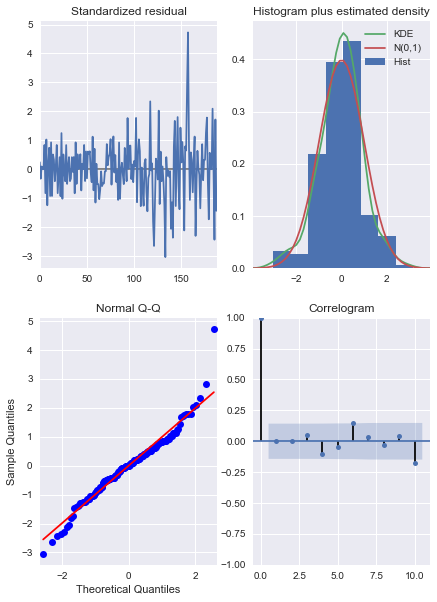

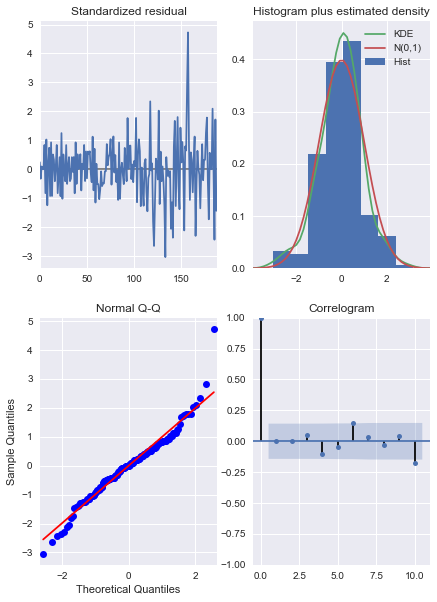

In [83]:
model_1.plot_diagnostics(figsize=(7, 10))

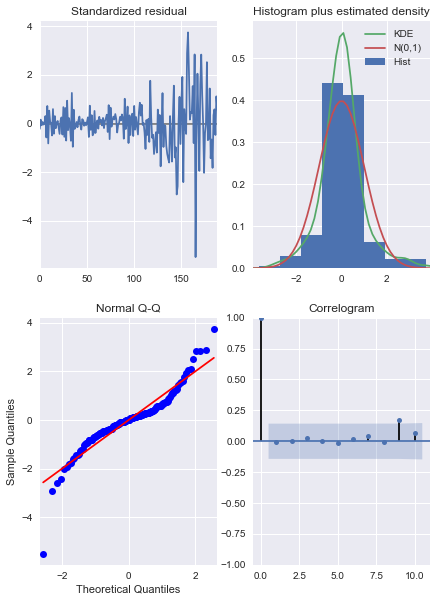

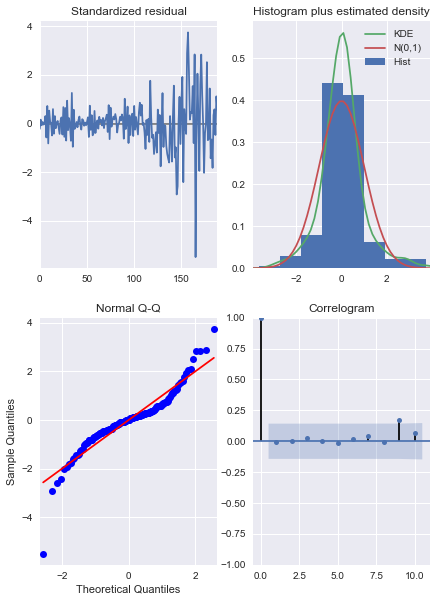

In [84]:
model_7.plot_diagnostics(figsize=(7, 10))

### Summary:

* Standardized residual graphs show that the **residual errors fluctuate around 150** for both of the models. 
* Histogram of the **Model 1** shows **normally distributed residuals**, since KDE and N are close to each other. 
* The **Normal Q-Q** graph shows **better performance of Model 1.**
* **Correlogram** shows **non significant correlation** for both models. 

# SARIMAX Model (2, 0, 0)

Now I will build SARIMAX model with (2, 0, 0) order for **all zipcodes and evaluate results.**

In [85]:
# metrics dataframe to store metrics of all zipcodes

metrics_2 = pd.DataFrame(columns = ['AIC', 'Training RMSE','Testing RMSE'], index = df_final.columns)

# list of all train and test dataframes

train_df = [train_1, train_2, train_3, train_4, train_5, train_6, train_7, train_8]
test_df = [test_1, test_2, test_3, test_4, test_5, test_6, test_7, test_8]



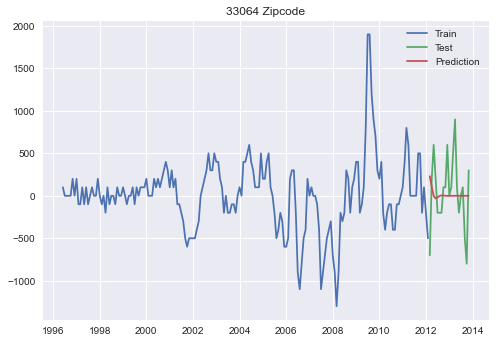

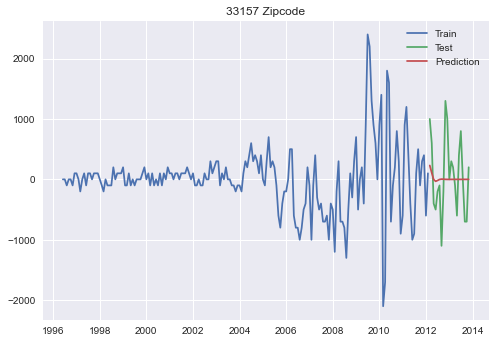

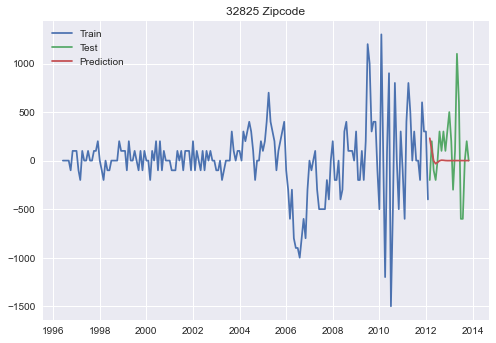

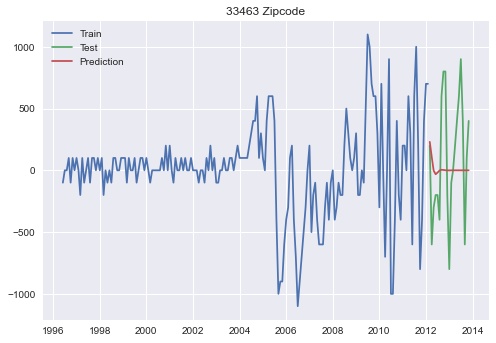

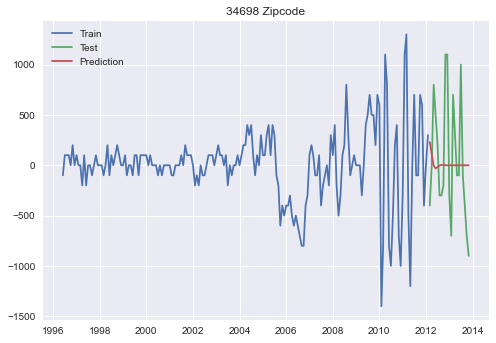

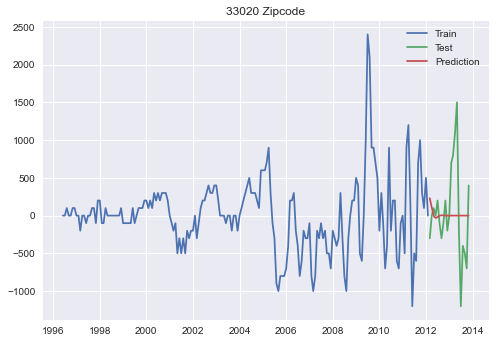

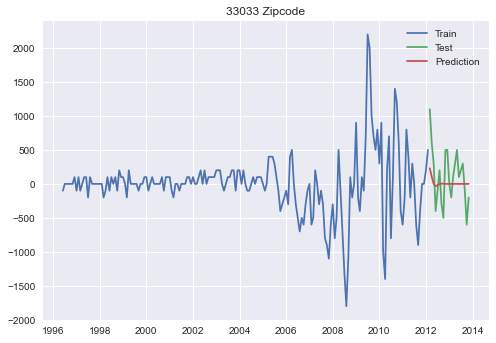

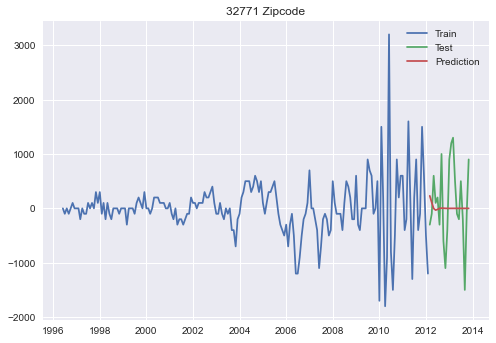

In [86]:
#call SARIMAX function 
tsf.sarimax_model(train_df, test_df, metrics_2)


In [87]:
metrics_2

AIC Training RMSE Testing RMSE
Zipcode                                    
33064    2866.77       386.119      430.646
33157    2866.77       467.844      598.627
32825    2866.77       338.697      392.841
32771    2866.77       429.201      729.248
33463    2866.77       354.469      497.041
34698    2866.77       486.801      604.566
33020    2866.77       399.077      604.509
33033    2866.77       386.454      381.653

### Summary:

The **AIC parameter is higher** than in AUTO-ARIMA model, the **training set is overfitting model.**

# Facebook Prophet Model

I will build a Facebook Prophet Model since it suppose to performe better with seasonal data, be robust to shifts in trend and hande outliers well. 

### Train - Test Split

The data for FB Prophet should be non differenced, thus I will create new train and test splits for modeling.

In [88]:
prophet_df = fl_df[['33064', '33157', '32825', '32771', '33463','34698', '33020','33033']]

In [89]:
pdf_33064 = pd.DataFrame(prophet_df['33064'])
pdf_33157 = pd.DataFrame(prophet_df['33157'])
pdf_32825 = pd.DataFrame(prophet_df['32825'])
pdf_33463 = pd.DataFrame(prophet_df['33463'])
pdf_34698 = pd.DataFrame(prophet_df['34698'])
pdf_33020 = pd.DataFrame(prophet_df['33020'])
pdf_33033 = pd.DataFrame(prophet_df['33033'])
pdf_32771 = pd.DataFrame(prophet_df['32771'])

In [90]:
ptrain_1,ptest_1,phold_1 = ed.train_test_holdout_split(pdf_33064)
ptrain_2,ptest_2,phold_2 = ed.train_test_holdout_split(pdf_33157)
ptrain_3,ptest_3,phold_3 = ed.train_test_holdout_split(pdf_32825)
ptrain_4,ptest_4,phold_4 = ed.train_test_holdout_split(pdf_33463)
ptrain_5,ptest_5,phold_5 = ed.train_test_holdout_split(pdf_34698)
ptrain_6,ptest_6,phold_6 = ed.train_test_holdout_split(pdf_33020)
ptrain_7,ptest_7,phold_7 = ed.train_test_holdout_split(pdf_33033)
ptrain_8,ptest_8,phold_8 = ed.train_test_holdout_split(pdf_32771)

In [91]:
# the function returns the datasets with resetted index and column names ds and y, 
# since that's a FB Prophet convention
ed.prophet_df([ptrain_1, ptest_1])
ed.prophet_df([ptrain_2, ptest_2])
ed.prophet_df([ptrain_3, ptest_3])
ed.prophet_df([ptrain_4, ptest_4])
ed.prophet_df([ptrain_5, ptest_5])
ed.prophet_df([ptrain_6, ptest_6])
ed.prophet_df([ptrain_7, ptest_7])
ed.prophet_df([ptrain_8, ptest_8])

In [92]:
!pip install pystan==2.17.1.0

In [93]:
!pip install fbprophet

In [94]:
from fbprophet import Prophet

### 33064 Zipcode 

In [95]:
pmodel_1 = Prophet(weekly_seasonality=True, daily_seasonality=True)
pmodel_1.fit(ptrain_1)

In [96]:
pdf_1 = pmodel_1.make_future_dataframe(periods=len(ptest_1), freq='MS')

In [97]:
forecast_1 = pmodel_1.predict(pdf_1)
forecast_1.head()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 1996-04-01  70632.664215  32225.006642  83578.566842  70632.664215   
1 1996-05-01  71318.970415  34623.778109  84971.509529  71318.970415   
2 1996-06-01  72028.153488  37964.641986  88341.895170  72028.153488   
3 1996-07-01  72714.459688  35921.033809  85934.093992  72714.459688   
4 1996-08-01  73423.642762  41415.572264  92361.252506  73423.642762   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  70632.664215   -12108.446568         -12108.446568         -12108.446568   
1  71318.970415   -11932.541127         -11932.541127         -11932.541127   
2  72028.153488    -9202.304203          -9202.304203          -9202.304203   
3  72714.459688   -12125.862551         -12125.862551         -12125.862551   
4  73423.642762    -7582.657243          -7582.657243          -7582.657243   

        daily  daily_lower  daily_upper       weekly  weekly_lower  \
0 -9480.64454  -9480.64454  -9480.64454 -2972.225378  -2972.225378   
1 -9480.64454  -9480.64454  -9480.64454 -1861.557075  -1861.557075   
2 -9480.64454  -9480.64454  -9480.64454  1253.196802   1253.196802   
3 -9480.64454  -9480.64454  -9480.64454 -2972.225378  -2972.225378   
4 -9480.64454  -9480.64454  -9480.64454  1891.895511   1891.895511   

   weekly_upper      yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0  -2972.225378  344.423350    344.423350    344.423350                   0.0   
1  -1861.557075 -590.339512   -590.339512   -590.339512                   0.0   
2   1253.196802 -974.856465   -974.856465   -974.856465                   0.0   
3  -2972.225378  327.007367    327.007367    327.007367                   0.0   
4   1891.895511    6.091786      6.091786      6.091786                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  58524.217647  
1                         0.0                         0.0  59386.429288  
2                         0.0                         0.0  62825.849285  
3                         0.0                         0.0  60588.597137  
4                         0.0                         0.0  65840.985519

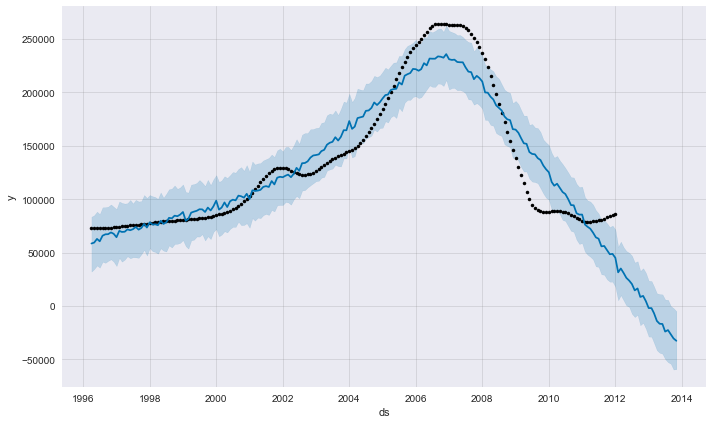

In [98]:
pmodel_1.plot(forecast_1, uncertainty=True)
plt.show()

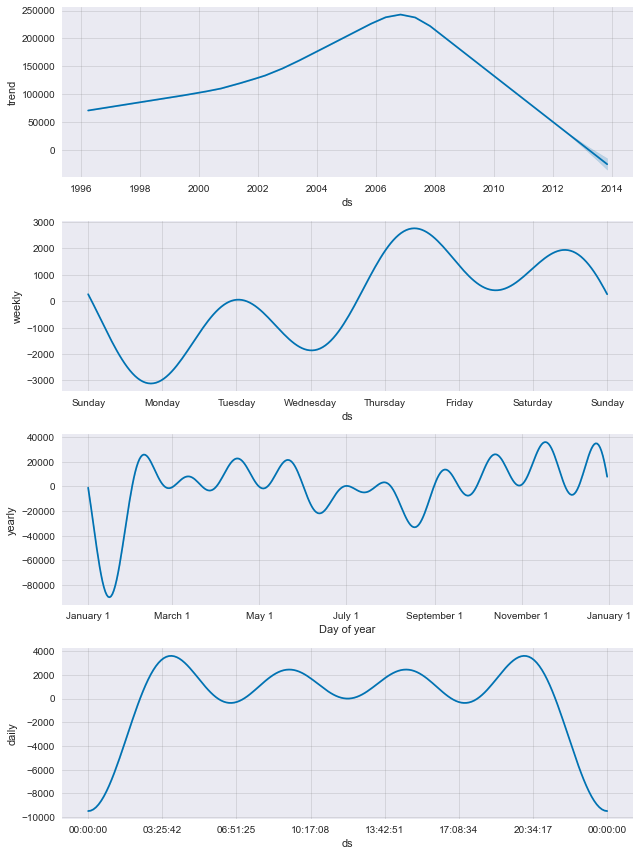

In [99]:
pmodel_1.plot_components(forecast_1)
plt.show()

* Now I will plot forecast values with actual values and calculate the RMSE

Testing RMSE =  99864.44912830285


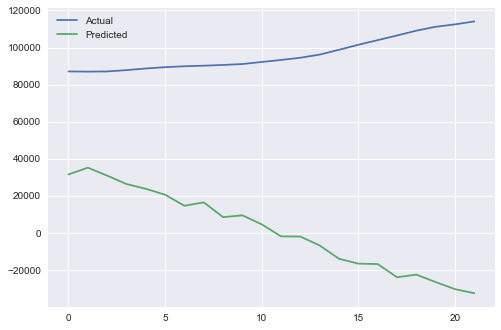

In [100]:
y_pred = forecast_1['yhat'][-22:].values

testing_MSE = mean_squared_error(ptest_1, y_pred)**.5
print('Testing RMSE = ', testing_MSE)

#mae_1 = mean_absolute_error(y_true, y_pred)
#print('MAE: %.3f' % mae)

# plot expected vs actual
plt.plot(ptest_1.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

### 33033 Zipcode

In [101]:
pmodel_7 = Prophet(weekly_seasonality=True, daily_seasonality=True)
pmodel_7.fit(ptrain_7)

In [102]:
pdf_7 = pmodel_7.make_future_dataframe(periods=len(ptest_7), freq='MS')

In [103]:
forecast_7 = pmodel_7.predict(pdf_7)
forecast_7.head()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 1996-04-01  75564.780769  49479.636791  88168.028239  75564.780769   
1 1996-05-01  75931.693561  48102.732085  89203.491650  75931.693561   
2 1996-06-01  76310.836779  49493.375194  90870.801101  76310.836779   
3 1996-07-01  76677.749571  51599.645713  90515.670342  76677.749571   
4 1996-08-01  77056.892790  55649.563262  94249.317569  77056.892790   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  75564.780769    -6818.049403          -6818.049403          -6818.049403   
1  75931.693561    -7932.161361          -7932.161361          -7932.161361   
2  76310.836779    -5285.148370          -5285.148370          -5285.148370   
3  76677.749571    -7362.876813          -7362.876813          -7362.876813   
4  77056.892790    -3500.166124          -3500.166124          -3500.166124   

         daily  daily_lower  daily_upper       weekly  weekly_lower  \
0 -3893.267736 -3893.267736 -3893.267736 -2006.132705  -2006.132705   
1 -3893.267736 -3893.267736 -3893.267736 -2075.748513  -2075.748513   
2 -3893.267736 -3893.267736 -3893.267736  1170.204183   1170.204183   
3 -3893.267736 -3893.267736 -3893.267736 -2006.132705  -2006.132705   
4 -3893.267736 -3893.267736 -3893.267736  1642.878034   1642.878034   

   weekly_upper       yearly  yearly_lower  yearly_upper  \
0  -2006.132705  -918.648962   -918.648962   -918.648962   
1  -2075.748513 -1963.145111  -1963.145111  -1963.145111   
2   1170.204183 -2562.084817  -2562.084817  -2562.084817   
3  -2006.132705 -1463.476371  -1463.476371  -1463.476371   
4   1642.878034 -1249.776422  -1249.776422  -1249.776422   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper          yhat  
0                         0.0  68746.731366  
1                         0.0  67999.532200  
2                         0.0  71025.688409  
3                         0.0  69314.872758  
4                         0.0  73556.726665

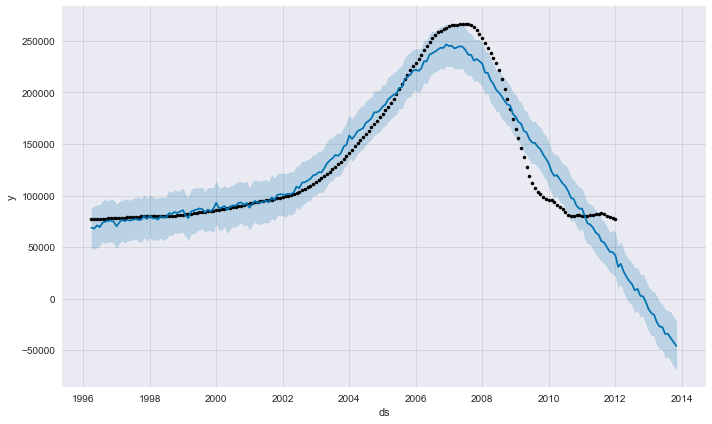

In [104]:
pmodel_7.plot(forecast_7, uncertainty=True)
plt.show()

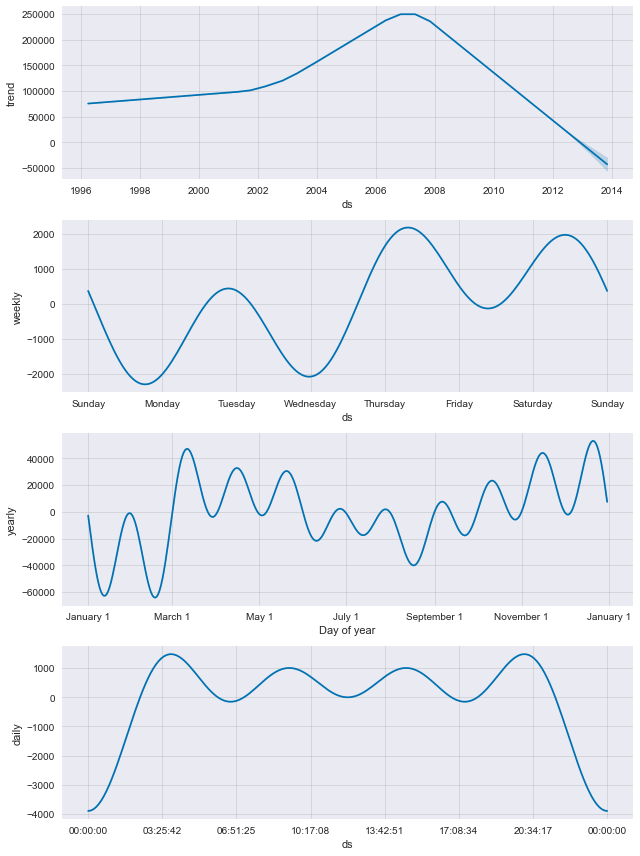

In [105]:
pmodel_7.plot_components(forecast_7)
plt.show()

* Now I will plot forecast values with actual values and calculate the RMSE

Testing RMSE =  102201.64838805365


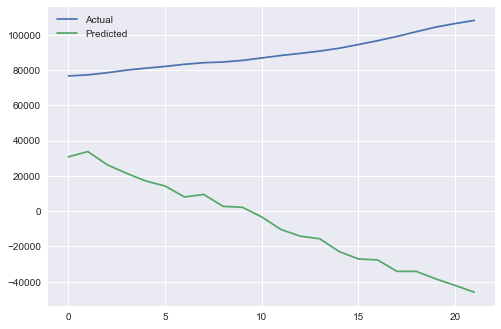

In [106]:
y_pred = forecast_7['yhat'][-22:].values

testing_MSE = mean_squared_error(ptest_7, y_pred)**.5
print('Testing RMSE = ', testing_MSE)

#mae_1 = mean_absolute_error(y_true, y_pred)
#print('MAE: %.3f' % mae)

# plot expected vs actual
plt.plot(ptest_7.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

### 33157 Zipcode

In [107]:
pmodel_2 = Prophet(weekly_seasonality=True, daily_seasonality=True)
pmodel_2.fit(ptrain_2)

In [108]:
pdf_2 = pmodel_2.make_future_dataframe(periods=len(ptest_2), freq='MS')

In [109]:
forecast_2 = pmodel_2.predict(pdf_2)
forecast_2.head()

ds          trend    yhat_lower     yhat_upper    trend_lower  \
0 1996-04-01  104144.728826  72262.654455  119907.205166  104144.728826   
1 1996-05-01  104669.127804  70384.155962  119995.493060  104669.127804   
2 1996-06-01  105211.006748  73197.405041  122659.430358  105211.006748   
3 1996-07-01  105735.405727  70326.801096  121202.486746  105735.405727   
4 1996-08-01  106277.284671  75156.612113  127376.963874  106277.284671   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  104144.728826    -9696.912517          -9696.912517          -9696.912517   
1  104669.127804   -10195.364223         -10195.364223         -10195.364223   
2  105211.006748    -7212.330715          -7212.330715          -7212.330715   
3  105735.405727    -9937.734255          -9937.734255          -9937.734255   
4  106277.284671    -5280.174397          -5280.174397          -5280.174397   

         daily  daily_lower  daily_upper       weekly  weekly_lower  \
0 -6319.219425 -6319.219425 -6319.219425 -2704.074004  -2704.074004   
1 -6319.219425 -6319.219425 -6319.219425 -2100.303032  -2100.303032   
2 -6319.219425 -6319.219425 -6319.219425  1408.663859   1408.663859   
3 -6319.219425 -6319.219425 -6319.219425 -2704.074004  -2704.074004   
4 -6319.219425 -6319.219425 -6319.219425  1786.772308   1786.772308   

   weekly_upper       yearly  yearly_lower  yearly_upper  \
0  -2704.074004  -673.619088   -673.619088   -673.619088   
1  -2100.303032 -1775.841766  -1775.841766  -1775.841766   
2   1408.663859 -2301.775149  -2301.775149  -2301.775149   
3  -2704.074004  -914.440826   -914.440826   -914.440826   
4   1786.772308  -747.727280   -747.727280   -747.727280   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper           yhat  
0                         0.0   94447.816309  
1                         0.0   94473.763581  
2                         0.0   97998.676033  
3                         0.0   95797.671472  
4                         0.0  100997.110274

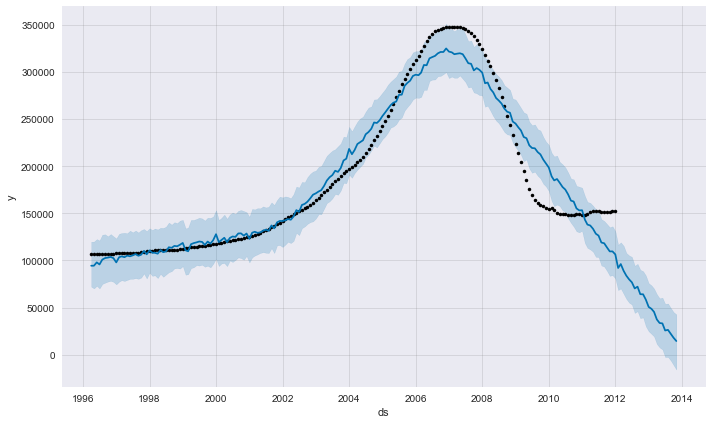

In [110]:
pmodel_2.plot(forecast_2, uncertainty=True)
plt.show()

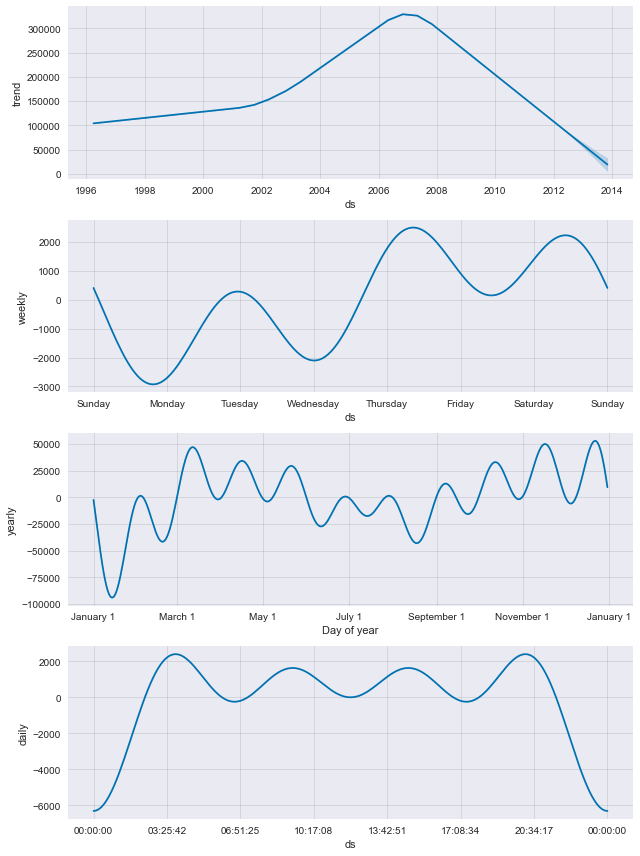

In [111]:
pmodel_2.plot_components(forecast_2)
plt.show()

* Now I will plot forecast values with actual values and calculate the RMSE

Testing RMSE =  113527.85676040436


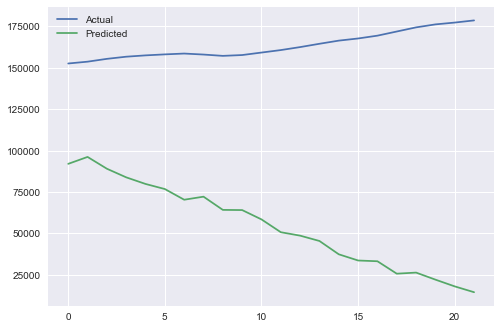

In [112]:
y_pred = forecast_2['yhat'][-22:].values

testing_MSE = mean_squared_error(ptest_2, y_pred)**.5
print('Testing RMSE = ', testing_MSE)

#mae_1 = mean_absolute_error(y_true, y_pred)
#print('MAE: %.3f' % mae)

# plot expected vs actual
plt.plot(ptest_2.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

### Summary:

After building models for three datasets, it is clear that **Facebook Prophet performed worse than ARIMA models**. The **Mean Squared Error is higher with Prophet** and due to noticable fluctuation in dataset, the model **forecasts in downward direction**, whereas the **actual values go up**.

## Final Model SARIMAX (2, 0, 0) with Holdout Data

The evaluation of all models showed that **SARIMAX model built by auto-ARIMA** for zipcode "33064" **performed better** than others. Thus, I will build SARIMAX model with test and holdout data.

In [113]:
# metrics dataframe to store metrics of all zipcodes

metrics_hold = pd.DataFrame(columns = ['AIC', 'Training RMSE','Testing RMSE'], index = df_final.columns)

# holdout dataframes

holdout_df = [hold_1, hold_2, hold_3, hold_4, hold_5, hold_6, hold_7, hold_8]

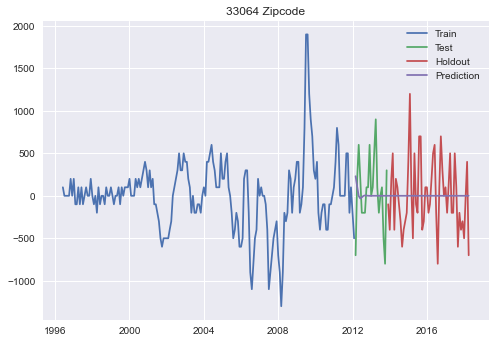

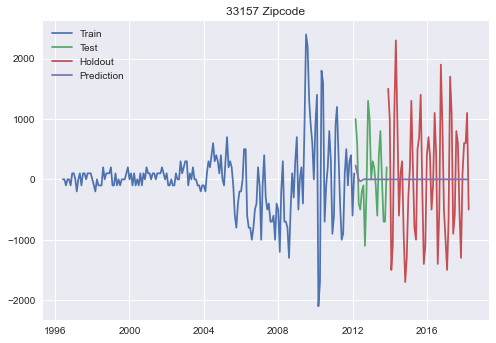

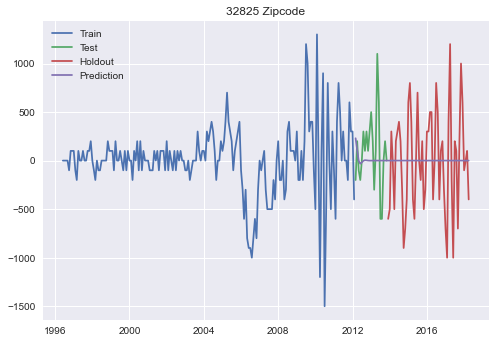

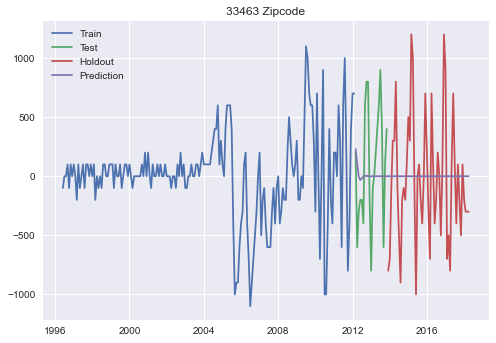

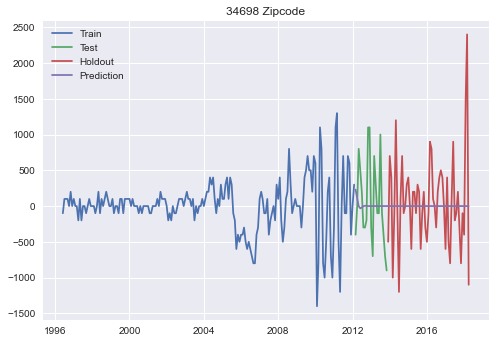

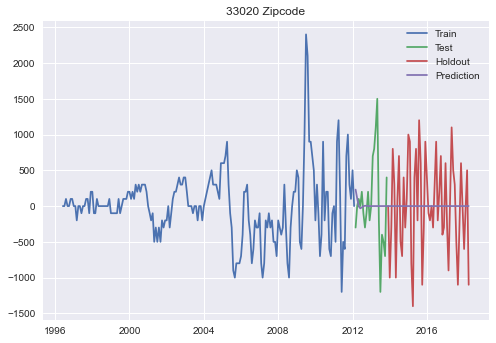

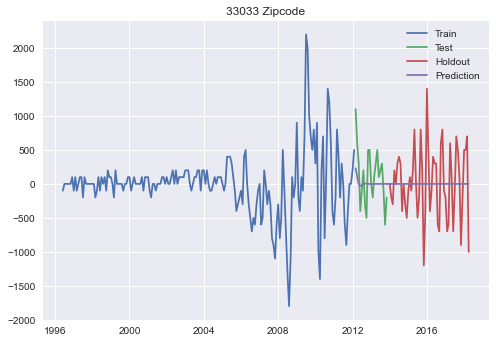

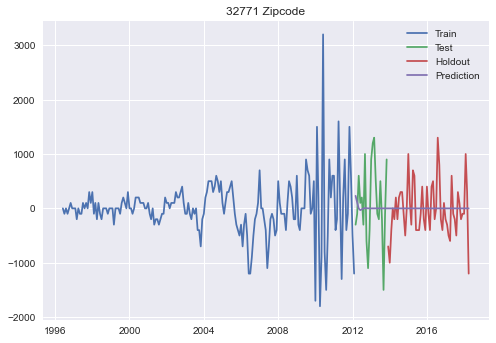

In [114]:
#call SARIMAX function 
f_ct1, f_ct2, f_ct3, f_ct4, f_ct5, f_ct6, f_ct7, f_ct8 = tsf.sarimax_final_model(train_df, 
                                                                                 test_df, holdout_df, 
                                                                                 metrics_hold)

In [115]:
metrics_hold

AIC Training RMSE Testing RMSE
Zipcode                                    
33064    2866.77       386.119      417.434
33157    2866.77       467.844      902.215
32825    2866.77       338.697      478.466
32771    2866.77       429.201      565.062
33463    2866.77       354.469      511.332
34698    2866.77       486.801      627.904
33020    2866.77       399.077      633.779
33033    2866.77       386.454      481.956

# Results and Conclusion

Based on model metrics, the following zipcodes are the best options: **33064, 32825, 32771, 33033, 34698**. Now, I will calculate the actual values of the forecast and print out last metrics.

In [116]:
#forecast_df = [f_ct1, f_ct3, f_ct4, f_ct6, f_ct8]

In [117]:
# f_df1 = pd.DataFrame(fl_df['33064'])
# f_df2 = pd.DataFrame(fl_df['32825'])
# f_df3 = pd.DataFrame(fl_df['34698'])
# f_df4 = pd.DataFrame(fl_df['33033'])
# f_df5 = pd.DataFrame(fl_df['32771'])

# final_df = [f_df1, f_df2, f_df3, f_df4, f_df5]

# for df in final_df:
#     df.reset_index(drop=True, inplace=True)

In [118]:
# def calc_median(df):
#     return df.median()
    
# def calc_forecast_ROI(forecast):
    
#     return ((np.exp(forecast.iloc[-1]) - np.exp(forecast.iloc[-2]))/
#             np.exp(forecast.iloc[-1]))

# def final_ROI(dfs, forecasts, roi):
#     comparison = pd.DataFrame(columns=['Median_Housing_Price','Actual_2018_ROI', 'Forecast_2018_ROI'], 
#                               index = ['33064', '32825', '34698', '33033', '32771'])
    
# #     for i in range(len(comparison.columns)):
# #         comparison[[0][i]] = dfs[i][:,0].median(axis = 0)
# #         comparison[[1][i]] = round(roi[i], 3)
# #         comparison[[2][i]] = round(100*calc_forecast_ROI(forecasts[i]),2)
        
#     for i in range(len(dfs)):
#         comparison['Median_Housing_Price'].loc[list(dfs[i].columns)[0]] = list(dfs[i].median())[0]
#         comparison['Actual_2018_ROI'].loc[list(dfs[i].columns)[0]] = round(roi[list(dfs[i].columns)[0]], 3)
#         comparison['Forecast_2018_ROI'].loc[list(dfs[i].columns)[0]] = round(100*calc_forecast_ROI(forecasts[i]),2)
        
    
    
    
# #     for i, df in enumerate(dfs):
# #         metrics = [df.iloc[0,-1], round(roi.loc[list(df.columns)[1]]), 
# #                    round(100*calc_forecast_ROI(forecasts[i]),2)]
# #         comparison[df[[list(df.columns)[0][0]]] = metrics        
#     return comparison


In [119]:
# final_metric = final_ROI(final_df, forecast_df, roi)
# final_metric

### Results:

* All **training data overfitted models**.
* The **models are all very skewed** because of the market crash in 2009.
* Relying on the project assumptions, data exploration and modeling, following zipcodes are chosen as best ones to invest in:**33064, 32825, 32771, 33033, 34698**

### Notes:

* Real estate **predictions** may vary due to **unseen fluctuations** in the market.

### Next Steps:

* Obtain **data after 2018 for current predictions.
* Use **samples only after Great Recession** period to model.
* Set **ROI threshold to lower values.**

In [120]:
calc_forecast_ROI(f_ct3)

NameError: name 'calc_forecast_ROI' is not defined

In [ ]:
list(f_ct1[0]).predicted_mean()

In [ ]:
list(final_df[0].median())[0]

In [ ]:
roi['33064']

In [ ]:
list(final_df[0].columns)[0]

In [ ]:
type(roi)

In [ ]:
list(f_df1.columns)[0]